# Technical Stock Analysis of FAANG Companies

**Group A10** 

* Neeharika Kamireddy
* Luca Matteucci
* Honglin Jiang
* Ruiqi (Freya) Jiang
* Chirayu (Mitthi) Jain
* Yuanshan (Olaf) Zhang

**Tableau Dashboard Link:** https://public.tableau.com/views/BA775DashboardA10_17022275738370/FAANGPortfolioAnalysis?:language=en-US&:display_count=n&:origin=viz_share_link

## 1. Introduction & Motivation

### 1.1 Executive Report Summary

This portfolio analysis notebook offers a comprehensive evaluation of the performance and trends observed in the FAANG stocks—Apple, Facebook, Amazon, Netflix, and Google (Alphabet)—over the period spanning from 2008 to 2023. The analysis encompasses key financial metrics, technical indicators <font color='blue'>[1]</font>, and portfolio value trends, providing insights into market behavior and potential investment opportunities. Towards the end of the project, we delved into a few key findings using complex SQL queries and presented interesting visualization. Based on these findings, it was determined that all the stocks reached peak prices within the specified time frame, stabilizing towards the end. Notably, NFLX and META exhibited high volatility from 2011 to 2016, which relatively decreased during the COVID period. Additionally, there was a remarkable 300% growth in the average value of the FAANG portfolio data.

The comprehensive portfolio analysis dashboard evaluates the dynamics of FAANG stocks (Apple, Facebook, Amazon, Netflix, and Google/Alphabet) through a dual-layered approach. The first dashboard provides an overarching view of daily market movers, liquidity patterns, and long-term portfolio trends, offering investors strategic insights for navigating the ever-evolving tech landscape. Meanwhile, the second dashboard delves into the intricacies of technical analysis, employing indicators like OBV, MACD, AD, and RSI to uncover nuanced details on momentum, volatility, and trends. Through visualizations such as candle charts, MACD overlays, and volume indicators, investors can decipher market signals, empowering them to make informed decisions. The combined information from both dashboards equips users with a holistic understanding of FAANG stocks, enabling strategic investment decisions in an ever-changing financial landscape.

<font color='blue'>[1]</font> Note:

The calculation queries of technical indicators, Relative Strength Index and Accumulation/Distribution, of other companies except Apple are added in the appendix (Section 8), as they are similar queries.

### 1.2 Problem Definition

We propose a dynamic dashboard for traders and asset managers, focused on FAANG stocks (Meta, Apple, Amazon, Netflix, Google) over the past decade. This interactive tool integrates stock prices and technical indicators, aiding in trend identification. Developed in the 1950s, these indicators offer valuable signals based on historical trading data. Our goal is to enable traders to visualize these patterns and identify trading opportunities. 

The dynamic dashboard goes beyond just visualizations; it actively enables traders to identify market trends and potential entry/exit points by providing real-time insights. By using historical data and known technical indicators our dashboard can act as a comprehensive and sophisticated tool that is basically a decision support system to enhance trading strategies for traders. 

Initially, we'll use 15 years of FAANG stock data as an MVP, with the potential to expand to other stocks based on client requirements. Our goal is to enable traders to visualize these patterns and identify trading opportunities for FAANG companies, with the potential to expand to other stocks based on client requirements.

In essence, our dynamic dashboard is designed keeping in mind the complexities of the stock market, making it an important asset for strategic decision making for traders.

### 1.3 Background & Motivation

We were motivated to build a comprehensive dashboard that showcases stock performances as a user-friendly tool for traders and asset managers. We feel this is important because traders often face the challenge of dealing with vast amounts of financial data from multiple sources, but the dynamic dashboard would streamline this process by consolidating the relevant stocks and reducing information overload. We want traders and asset managers to be able to conduct comprehensive analysis by integrating sotck prices and technical indicators, enable them to identify historical trends, and allow the dashboard to be used as a decision support tool for traders to validate their trading strategies, identify risks, and make more informed decisions. 
We are also motivated by this project as it will enhance our data extraction skills and help us to construct a financial tool. Those who are interested in trading by passion or profession would benefit greatly from reading our analysis as it dives into a myriad of questions that puzzle traders and our dashboard as well as our analysis provides deep insight into answering those questions.

### 1.4 Data + Data Source

The data source for this data set is [IEX Cloud Data](https://iexcloud.io/docs/core)
We used the historical equity prices of the FAANG companies for the past decade, and merged them into one table:

Each row represents a specific stock’s performance on a specific day. 

* [META](https://api.iex.cloud/v1/data/core/historical_prices/META?range=10y&token=pk_0dac8c928cb54cae8c9a6e3ac1932e5b)
* [AMAZON](https://api.iex.cloud/v1/data/core/historical_prices/AMZN?range=10y&token=pk_0dac8c928cb54cae8c9a6e3ac1932e5b)
* [APPLE](https://api.iex.cloud/v1/data/core/historical_prices/AAPL?range=10y&token=pk_0dac8c928cb54cae8c9a6e3ac1932e5b) 
* [NETFLIX](https://api.iex.cloud/v1/data/core/historical_prices/NFLX?range=10y&token=pk_0dac8c928cb54cae8c9a6e3ac1932e5b)
* [GOOGLE](https://api.iex.cloud/v1/data/core/historical_prices/GOOG?range=10y&token=pk_0dac8c928cb54cae8c9a6e3ac1932e5b)

We also merged the historical technical indicators of FAANG companies into one table, with the intention of using JOINS later on:
* [META](https://api.iex.cloud/v1/stock/meta/indicator/sma?range=10y&token=pk_0dac8c928cb54cae8c9a6e3ac1932e5b)
* [AMAZON](https://api.iex.cloud/v1/stock/amzn/indicator/sma?range=10y&token=pk_0dac8c928cb54cae8c9a6e3ac1932e5b)
* [APPLE](https://api.iex.cloud/v1/stock/aapl/indicator/sma?range=10y&token=pk_0dac8c928cb54cae8c9a6e3ac1932e5b) 
* [NETFLIX](https://api.iex.cloud/v1/stock/nflx/indicator/sma?range=10y&token=pk_0dac8c928cb54cae8c9a6e3ac1932e5b)
* [GOOGLE](https://api.iex.cloud/v1/stock/goog/indicator/sma?range=10y&token=pk_0dac8c928cb54cae8c9a6e3ac1932e5b)

As new stock data is available daily, we chose, as a convention, to conclude our analysis on November 11th, 2023.

(FYI, in case you need a token to access the dataset, pk_0dac8c928cb54cae8c9a6e3ac1932e5b can be used.)

The merged table of the historical equity prices of the FAANG companies consists of 16,221 rows and 21 columns. Each row in the table describes the stock prices of a particular company for each date for the past 15 years.<br>
The merged table of the technical indicators consists of 16,112 rows and 33 columns. Each row in the table indicates the technical indicators value for a particular company for each date in the time period.

Data Dictionary:

    close: Adjusted data for historical dates. Split adjusted only.

    fclose: Fully adjusted for historical dates. Close price.

    fhigh: Fully adjusted for historical dates. Highest price point in the day.

    flow: Fully adjusted for historical dates. Lowest price point in the day.

    fopen: Fully adjusted for historical dates. Open price.

    fvolume: Fully adjusted for historical dates. Daily trading volume.

    high: Adjusted data for historical dates. Split adjusted only.

    low: Adjusted data for historical dates. Split adjusted only.

    open: Adjusted data for historical dates. Split adjusted only.

    priceDate: Associated symbol or ticker.

    symbol: Unadjusted data for historical dates.

    uclose: Unadjusted data for historical dates.

    uhigh: Unadjusted data for historical dates.

    ulow: Unadjusted data for historical dates.

    uopen: Unadjusted data for historical dates.

    uvolume: Unadjusted data for historical dates.

    volume: Adjusted data for historical dates. Split adjusted only.

    aroon_osc: Aroon Oscillator measures how recently a high or low has occurred; when >0, it indicates a recent high happened more recently than a recent low, suggesting an expected upward price trend.

    macd_line: Moving Average Convergence Divergence (MACD) line represents the difference between short-term and long-term Exponential Moving Averages (EMAs), revealing potential trend reversals and indicating momentum strength in asset prices.

    Signal_Line: Moving Average Convergence Divergence Signal line is a 9-day exponential moving average of the MACD indicator, employed in technical analysis to generate trading signals in financial markets.

    MACD_Histogram: MACD Histogram visually depicts the difference between the MACD line and the signal line, serving as an indicator of momentum and potential trend reversals in financial markets.

    Stochastic__K: Stochastic %K is a momentum indicator gauging the relative position of a closing price within a specified range over a defined period, offering insights into potential overbought or oversold market conditions.

    Stochastic__D: Stochastic %D is a momentum indicator representing the three-day simple moving average of the Stochastic Oscillator, providing insight into the current closing price relative to the recent price range.
    
    rsi: Relative Strength Index
    
    thirty_day_rolling_avg: Thirty Days Rolling Average
    
    ad: Accumulation/Distribution value
    
    obv: On-Balance Volume







### 1.5 Entity Relationship Diagram

The following cell depicts the Entity Relationship diagram for the dataset used in the project. This diagram represents the entity relationships between the daily stock price data and various technical indicators, used in our project, like Accumulation/distribution line, Aroon Oscillator, Moving average convergence divergence, On-balance volume, Rolling Average, Relative strength index and Stochastic oscillator for the stock of APPLE company. The 'aapl_market_data' table contains the daily stock price information related to Apple Company, with each row representing the stock price data for a specific date. The additional tables, such as AAPL_AD, AAPL_AROONOSC, AAPL_MACD, AAPL_OBV, AAPL_ROLLING_AVG, AAPL_RSI, and AAPL_STOCH, contain technical indicator values for Apple Company corresponding to each date. There is an optional one-to-one relationship between each row in 'aapl_market_data' and the indicator tables, as not all indicators may have information available for every single day. This understanding enables a comprehensive analysis of both stock prices and technical indicators for Apple Company over time.
An exact replica of this diagram will be followed for the other stocks used in the project, which are Meta, Amazon, Netflix and Google.

![ERD-BA775.png](https://github.com/neeharika59/BA775/blob/main/ERD-BA775%20(1).png?raw=true)

## 2. Data Cleaning, Aggregation and Profiling

**Data Cleaning For GOOG Inconsistent Market Data**

In [1]:
%%bigquery
SELECT priceDate FROM `ba775-a10.fanng_portfolio_data.goog_market_data`
ORDER BY priceDate;

DELETE FROM `ba775-a10.fanng_portfolio_data.goog_market_data` 
WHERE EXTRACT(year FROM priceDate) = 2015;

Query is running:   0%|          |

""


After reviewing each of our dataset, we spotted a series of inconsistent data for google in the year of 2015, with only 5 entries of pricing data for the whole year. As we find no error in our data retrieving method, we assume the missing data might be due to our data partner IEX. Because the volume is the missing data is only concentrated in the year of 2015, we decide the best approach is to trim off that period. After thatWe will go on to systemcatically validate our dataset to confirm there's no furthure missing date in rest of the dataset.

**Merging All Stock Data Into faang_portfolio Table**

In [2]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-a10.fanng_portfolio_data.faang_portfolio` AS
SELECT * FROM `ba775-a10.fanng_portfolio_data.amzn_market_data`
UNION DISTINCT
SELECT * FROM `ba775-a10.fanng_portfolio_data.meta_market_data`
UNION DISTINCT
SELECT * FROM `ba775-a10.fanng_portfolio_data.aapl_market_data`
UNION DISTINCT
SELECT * FROM `ba775-a10.fanng_portfolio_data.meta_market_data`
UNION DISTINCT
SELECT * FROM `ba775-a10.fanng_portfolio_data.nflx_market_data`
UNION DISTINCT
SELECT * FROM `ba775-a10.fanng_portfolio_data.goog_market_data`

Query is running:   0%|          |

""


Here we aggragated the market pricing data for all five fanng stocks into a portfolio dataset. This aggregated dataset will serve as a starting point where we will join in more indicator data to create a master dataset later. 

**Dropping Duplicated Column 'subkey'**

In [3]:
%%bigquery
ALTER TABLE `ba775-a10.fanng_portfolio_data.faang_portfolio`
DROP COLUMN subkey;

Query is running:   0%|          |

""


Cleaning up the portfolio dataset by dropping duplicated column (subkey). Both 'subkey' and 'symbol' consist of same ticker information.

**Merging stock indicators with market pricing data**

In [4]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-a10.fanng_portfolio_data.faang_market_ind` AS

SELECT aapl_aroonosc.Aroon_Osc AS aroon_osc, aapl_macd.MACD_Line AS macd_line, aapl_macd.Signal_Line, aapl_macd.MACD_Histogram, aapl_stoch.Stochastic__K, aapl_stoch.Stochastic__D, portfolio_market_data.symbol AS symbol_temp, portfolio_market_data.priceDate AS price_date, portfolio_market_data.*
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS portfolio_market_data
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AAPL_AROONOSC` AS aapl_aroonosc
ON portfolio_market_data.symbol = aapl_aroonosc.key
AND portfolio_market_data.priceDate = aapl_aroonosc.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AAPL_MACD` AS aapl_macd
ON portfolio_market_data.symbol = aapl_macd.symbol
AND portfolio_market_data.priceDate = aapl_macd.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AAPL_STOCH` AS aapl_stoch
ON portfolio_market_data.symbol = aapl_stoch.symbol
AND portfolio_market_data.priceDate = aapl_stoch.priceDate
WHERE aapl_aroonosc.Aroon_Osc IS NOT NULL 
  AND aapl_macd.MACD_Line IS NOT NULL 
  AND aapl_macd.Signal_Line IS NOT NULL 
  AND aapl_macd.MACD_Histogram IS NOT NULL 
  AND aapl_stoch.Stochastic__K IS NOT NULL 
  AND aapl_stoch.Stochastic__D IS NOT NULL 


UNION ALL

SELECT amzn_aroonosc.Aroon_Osc AS aroon_osc, amzn_macd.MACD_Line AS macd_line, amzn_macd.Signal_Line, amzn_macd.MACD_Histogram, amzn_stoch.Stochastic__K, amzn_stoch.Stochastic__D, portfolio_market_data.symbol AS symbol_temp, portfolio_market_data.priceDate AS price_date, portfolio_market_data.*
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS portfolio_market_data
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AMZN_AROONOSC` AS amzn_aroonosc
ON portfolio_market_data.symbol = amzn_aroonosc.key
AND portfolio_market_data.priceDate = amzn_aroonosc.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AMZN_MACD` AS amzn_macd
ON portfolio_market_data.symbol = amzn_macd.symbol
AND portfolio_market_data.priceDate = amzn_macd.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AMZN_STOCH` AS amzn_stoch
ON portfolio_market_data.symbol = amzn_stoch.symbol
AND portfolio_market_data.priceDate = amzn_stoch.priceDate
WHERE amzn_aroonosc.Aroon_Osc IS NOT NULL 
  AND amzn_macd.MACD_Line IS NOT NULL 
  AND amzn_macd.Signal_Line IS NOT NULL 
  AND amzn_macd.MACD_Histogram IS NOT NULL 
  AND amzn_stoch.Stochastic__K IS NOT NULL 
  AND amzn_stoch.Stochastic__D IS NOT NULL 

UNION ALL

SELECT goog_aroonosc.Aroon_Osc AS aroon_osc, goog_macd.MACD_Line AS macd_line, goog_macd.Signal_Line, goog_macd.MACD_Histogram, goog_stoch.Stochastic__K, goog_stoch.Stochastic__D, portfolio_market_data.symbol AS symbol_temp, portfolio_market_data.priceDate AS price_date, portfolio_market_data.*
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS portfolio_market_data
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.GOOG_AROONOSC` AS goog_aroonosc
ON portfolio_market_data.symbol = goog_aroonosc.key
AND portfolio_market_data.priceDate = goog_aroonosc.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.GOOG_MACD` AS goog_macd
ON portfolio_market_data.symbol = goog_macd.symbol
AND portfolio_market_data.priceDate = goog_macd.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.GOOG_STOCH` AS goog_stoch
ON portfolio_market_data.symbol = goog_stoch.symbol
AND portfolio_market_data.priceDate = goog_stoch.priceDate
WHERE goog_aroonosc.Aroon_Osc IS NOT NULL 
  AND goog_macd.MACD_Line IS NOT NULL 
  AND goog_macd.Signal_Line IS NOT NULL 
  AND goog_macd.MACD_Histogram IS NOT NULL 
  AND goog_stoch.Stochastic__K IS NOT NULL 
  AND goog_stoch.Stochastic__D IS NOT NULL

UNION ALL

SELECT meta_aroonosc.Aroon_Osc AS aroon_osc, meta_macd.MACD_Line AS macd_line, meta_macd.Signal_Line, meta_macd.MACD_Histogram, meta_stoch.Stochastic__K, meta_stoch.Stochastic__D, portfolio_market_data.symbol AS symbol_temp, portfolio_market_data.priceDate AS price_date, portfolio_market_data.*
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS portfolio_market_data
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.META_AROONOSC` AS meta_aroonosc
ON portfolio_market_data.symbol = meta_aroonosc.key
AND portfolio_market_data.priceDate = meta_aroonosc.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.META_MACD` AS meta_macd
ON portfolio_market_data.symbol = meta_macd.symbol
AND portfolio_market_data.priceDate = meta_macd.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.META_STOCH` AS meta_stoch
ON portfolio_market_data.symbol = meta_stoch.symbol
AND portfolio_market_data.priceDate = meta_stoch.priceDate
WHERE meta_aroonosc.Aroon_Osc IS NOT NULL 
  AND meta_macd.MACD_Line IS NOT NULL 
  AND meta_macd.Signal_Line IS NOT NULL 
  AND meta_macd.MACD_Histogram IS NOT NULL 
  AND meta_stoch.Stochastic__K IS NOT NULL 
  AND meta_stoch.Stochastic__D IS NOT NULL

UNION ALL

SELECT nflx_aroonosc.Aroon_Osc AS aroon_osc, nflx_macd.MACD_Line AS macd_line, nflx_macd.Signal_Line, nflx_macd.MACD_Histogram, nflx_stoch.Stochastic__K, nflx_stoch.Stochastic__D, portfolio_market_data.symbol AS symbol_temp, portfolio_market_data.priceDate AS price_date, portfolio_market_data.*
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS portfolio_market_data
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.NFLX_AROONOSC` AS nflx_aroonosc
ON portfolio_market_data.symbol = nflx_aroonosc.key
AND portfolio_market_data.priceDate = nflx_aroonosc.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.NFLX_MACD` AS nflx_macd
ON portfolio_market_data.symbol = nflx_macd.symbol
AND portfolio_market_data.priceDate = nflx_macd.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.NFLX_STOCH` AS nflx_stoch
ON portfolio_market_data.symbol = nflx_stoch.symbol
AND portfolio_market_data.priceDate = nflx_stoch.priceDate
WHERE nflx_aroonosc.Aroon_Osc IS NOT NULL 
  AND nflx_macd.MACD_Line IS NOT NULL 
  AND nflx_macd.Signal_Line IS NOT NULL 
  AND nflx_macd.MACD_Histogram IS NOT NULL 
  AND nflx_stoch.Stochastic__K IS NOT NULL 
  AND nflx_stoch.Stochastic__D IS NOT NULL

ORDER BY price_date

Query is running:   0%|          |

""


This steps lays the fondation for future visualization analysis. It contains the aggreagated information for entire FAANG portfolio, and makes it possible to perform time-series analysis and benchmarking and cross comparision in later analysis.

**Validating Our Dateset**

Validating our dataset containing all trading data for stocks that are availible for the trading period between 2018-12-23 to 2023-11-10

In [5]:
%%bigquery
SELECT ndx.Date AS MissingDate
FROM `ba775-a10.us_trading_date_reference.NDX_2008_2023` AS ndx
LEFT JOIN `ba775-a10.fanng_portfolio_data.faang_market_ind` AS fanng
ON ndx.Date = fanng.price_date
WHERE fanng.price_date IS NULL
ORDER BY MissingDate;

Query is running:   0%|          |

Downloading: |          |

,MissingDate


**Identifying Stocks That Are Missing Some Periods Of Data During Set Trading Period**

Possible reasons for this missing data are: stocks such as META, previously (FB) only went public after 2012 May 18th, GOOG non-voting class C shares being created after 2014 April 3rd.

In [6]:
%%bigquery
WITH all_trading_date AS (
    SELECT DISTINCT price_date
    FROM `ba775-a10.fanng_portfolio_data.faang_market_ind`
)
SELECT date_symbol.symbol, date_symbol.price_date AS missing_date FROM
(SELECT *
FROM all_trading_date atd
CROSS JOIN (SELECT DISTINCT symbol FROM `ba775-a10.fanng_portfolio_data.faang_market_ind`
) ats
ORDER BY price_date) date_symbol
LEFT JOIN `ba775-a10.fanng_portfolio_data.faang_market_ind` fanng 
ON date_symbol.price_date = fanng.price_date 
AND date_symbol.symbol = fanng.symbol
WHERE fanng.price_date IS NULL
ORDER BY date_symbol.price_date

Query is running:   0%|          |

Downloading:   0%|          |

,symbol,missing_date
0,GOOG,2008-12-23
1,META,2008-12-23
2,GOOG,2008-12-24
3,META,2008-12-24
4,GOOG,2008-12-26
...,...,...
2673,GOOG,2015-12-31
2674,GOOG,2016-02-25
2675,AAPL,2017-07-03
2676,GOOG,2017-07-03


**Creating a portfolio trend table with the prices for the fang portfolio (aggregated as average price of each stock) as well as a daily performance indicator.**

The function HAVING was added in order to create those trend only when the data for all the five stocks are available. This table will start from January 4th, 2016. 

In [7]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-a10.fanng_portfolio_data.portfolio_trend` AS
WITH portfolio_trend AS (
    SELECT 
        priceDate,
        ROUND(AVG(fclose), 2) AS portfolio_close,
        ROUND(AVG(fhigh), 2) AS portfolio_high,
        ROUND(AVG(flow), 2) AS portfolio_low,
        ROUND(AVG(fopen), 2) AS portfolio_open
    FROM `ba775-a10.fanng_portfolio_data.faang_portfolio`
    GROUP BY priceDate
    HAVING COUNT(DISTINCT symbol) = 5
    ORDER BY priceDate
)
SELECT 
    priceDate,
    portfolio_close,
    portfolio_high,
    portfolio_low,
    portfolio_open,
    CASE
        WHEN ROW_NUMBER() OVER (ORDER BY priceDate) = 1 THEN 0
        ELSE ROUND(((portfolio_close - LAG(portfolio_close, 1) OVER (ORDER BY priceDate)) / LAG(portfolio_close, 1) OVER (ORDER BY priceDate)) * 100, 2)
    END AS portfolio_daily_percent_change
FROM portfolio_trend
ORDER BY priceDate;

Query is running:   0%|          |

""


This table will assist us in analyzing trends within our aggregated portfolio. An investor will be able to purchase a stake in this portfolio and review their performance without the need to check all five individual stocks.

## 3. Questions & Exploratory Data Analysis

### 3.1 Basic Statistical Summary

As a first step to our analysis, we wanted to explore the basic statistical summary of our dataset. Calculating the mean, median, and standard deviation of the closing prices for each stock provides an overview of the dataset that could be helpful for us to understand it better. 

**Mean**

In [8]:
%%bigquery
SELECT symbol, AVG(close) AS average_price  
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio`
GROUP BY symbol
ORDER BY average_price;

Query is running:   0%|          |

Downloading:   0%|          |

,symbol,average_price
0,AAPL,54.536959
1,AMZN,58.028306
2,GOOG,78.133457
3,META,155.360780
4,NFLX,184.902243


**Median**

In [9]:
%%bigquery
SELECT symbol, APPROX_QUANTILES(close, 100)[OFFSET(50)] AS median_price
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio`
GROUP BY symbol
ORDER BY median_price;

Query is running:   0%|          |

Downloading:   0%|          |

,symbol,median_price
0,AAPL,29.2450
1,AMZN,34.5680
2,GOOG,63.3305
3,NFLX,103.9600
4,META,151.7900


**Standard Deviation**

In [10]:
%%bigquery
SELECT symbol, STDDEV_SAMP(close) AS price_standard_deviation
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio`
GROUP BY symbol
ORDER BY price_standard_deviation;

Query is running:   0%|          |

Downloading:   0%|          |

,symbol,price_standard_deviation
0,GOOG,34.629105
1,AAPL,53.986310
2,AMZN,54.534663
3,META,89.450714
4,NFLX,180.030732


We noticed that the order of the mean and the median is approximately consistent, with only META and NFLX changing their positions. This suggests that each company has essentially maintained its relative position, but META has outperformed all others to become the top performer. According to the standard deviation, we can observe that GOOG's performance over the past 15 years has been the most stable, while NFLX has exhibited the highest level of fluctuation.

**Average Trading Volume**

In [11]:
%%bigquery
SELECT symbol, AVG(volume) AS avg_daily_volume
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio`
GROUP BY symbol
ORDER BY symbol;

Query is running:   0%|          |

Downloading:   0%|          |

,symbol,avg_daily_volume
0,AAPL,2.739662e+08
1,AMZN,9.334619e+07
2,GOOG,3.098820e+07
3,META,3.083017e+07
4,NFLX,1.722597e+07


The above query calculates the average daily trading volume for each stock within the FAANG portfolio. By aggregating the data based on stocks and computing the average volume, it provides a comprehensive overview of the typical daily trading activity for each stock. A higher average daily volume may signify greater market activity and liquidity, while a lower volume could suggest lower market activity. This analysis aids in assessing the overall market situation and potential trading dynamics for each stock within the FAANG portfolio, supporting more informed investment decisions.

### 3.2 What influence do the technical indicators Aroon Oscillator, MACD and Stochastic Oscillator have on different stocks?

**Aroon Oscillator**

This query calculates the average and standard devaition for Aroon Oscillator values of the FAANG companies for a period of 15 years.

In [12]:
%%bigquery
SELECT symbol, avg(aroon_osc) as Avg_Aroon_Osc, stddev(aroon_osc) as Std_Dev_Aroon_Osc
FROM `ba775-a10.fanng_portfolio_data.faang_market_ind`
GROUP BY symbol
ORDER BY Avg_Aroon_Osc;

Query is running:   0%|          |

Downloading:   0%|          |

,symbol,Avg_Aroon_Osc,Std_Dev_Aroon_Osc
0,AMZN,9.267253,69.088809
1,NFLX,9.441192,68.543978
2,META,9.756267,68.746627
3,GOOG,10.349014,68.387512
4,AAPL,14.434968,69.158406


All the companies show positive average aroon oscillator values and relatively high standard deviation aroon oscillator values. This indicates that the companies have had a positive uptrend during the time period. Also, the standard deviation values suggest that the companies have experienced significant fluctuations, either uptrend or downtrend, over the time period.

**MACD**

The below query calculates the average and standard deviation values of the results obtained from Moving average convergence/divergence (MACD) indicator for a period of 15 years.

In [13]:
%%bigquery
SELECT symbol, avg(macd_line) as Avg_Macd_Line, avg(Signal_Line) as Avg_Signal_Line, avg(MACD_Histogram) as Avg_Histogram, stddev(Macd_Line) as Std_Dev_Macd_Line, stddev(Signal_Line) as Std_Dev_Signal_Line, stddev(MACD_Histogram) as Std_Dev_MACD_Histogram
FROM `ba775-a10.fanng_portfolio_data.faang_market_ind`
GROUP BY symbol
ORDER BY Avg_Macd_Line;

Query is running:   0%|          |

Downloading:   0%|          |

,symbol,Avg_Macd_Line,Avg_Signal_Line,Avg_Histogram,Std_Dev_Macd_Line,Std_Dev_Signal_Line,Std_Dev_MACD_Histogram
0,AMZN,0.230308,0.228758,0.001550,1.675224,1.564397,0.534476
1,AAPL,0.306323,0.306037,0.000286,1.413920,1.328298,0.433498
2,GOOG,0.323938,0.327426,-0.003488,1.413729,1.316910,0.454930
3,META,0.645274,0.642602,0.002672,4.335468,4.130301,1.178907
4,NFLX,0.705439,0.695959,0.009480,7.455353,7.066035,2.112430


All the companies show a positive average MACD Line and Signal Line values. However, all the companies, except Google, return a positive MACD Histogram value. A positive average MACD line and Signal line indicates that there has been a positive momentum in the stock price values. But, the negative average MACD Histogram value for Google denotes that Google's MACD Line is below its Signal Line, eventually meaning a decline in the stock prices. 
A positive standard deviation values of MACD line, Signal line and MACD Histogram can be observed for all the companies. This indicates that all the stocks have high variability between their moving averages.

**Stochastic Oscillator**

The following query calculates the average and standard deviation values for Stochastic K and Stochastic D values for a period of 15 years.

In [14]:
%%bigquery
SELECT symbol, avg(Stochastic__K) as Avg_Stochastic_K, avg(Stochastic__D) as Avg_Stochastic_D, stddev(Stochastic__K) as Std_Dev_Stochastic_K, stddev(Stochastic__D) as Std_Stochastic_D
FROM `ba775-a10.fanng_portfolio_data.faang_market_ind`
GROUP BY symbol
ORDER BY Avg_Stochastic_K;

Query is running:   0%|          |

Downloading:   0%|          |

,symbol,Avg_Stochastic_K,Avg_Stochastic_D,Std_Dev_Stochastic_K,Std_Stochastic_D
0,NFLX,53.563693,53.549954,25.293147,23.374759
1,META,54.614491,54.615471,24.985231,22.994254
2,AMZN,55.351846,55.344950,25.352404,23.325014
3,GOOG,55.880788,55.877506,25.167519,23.047908
4,AAPL,56.762687,56.742183,26.108831,24.249925


The stocks show a high positive average Stochastic K and Stochastic D values. This indicates that the stock's closing price has been closer to the recent price range. This can be confirmed by the relatively high average Stochastic D values.
The standard deviation values of Stochastic K and Stochastic D are comparitively low for all the companies. This suggests that the stocks have a relatively stable trends and less uncertainity. This helps the traders to interpret this as a less risk environment. 

### 3.3 What Stocks Were Overbought/Oversold?

We wanted to identify the overbought or oversold conditions in the market, helping traders and analysts make decisions about potential reversals in price direction. To achieve this, we have calculated the Relative Strength Index (RSI) which is a popular momentum oscillator that is used in technical analysis to measure the speed and change of price movements. 

Calculation:
1. **Time Period**: The standard period is 14, but it can be adjusted as needed.

2. **Calculate Average Gains and Losses**:
   - Calculate daily price changes (difference between the current closing price and the previous day's closing price) for the chosen period.
   - Separate these daily changes into gains (positive values) and losses (negative values).
   - Calculate the average gain and average loss over the chosen period, typically using a simple average.

3. **Calculate Relative Strength (RS)**: Relative Strength is the ratio of average gain to the absolute value of the average loss:
   $RS = \frac{\text{Average Gain}}{\text{Absolute Value of Average Loss}}$

4. **Calculate RSI**: Use the RS to calculate the RSI:
   $RSI = 100 - \frac{100}{1 + RS}$

The RSI ranges between 0 and 100. Typically, an RSI above 70 is considered overbought, while an RSI below 30 is considered oversold.

**Apple**

In [15]:
%%bigquery
with daily_returns as
(select key,
priceDate,
close, 
lag(close) over(order by priceDate) as close_last,
close - lag(close) over(order by priceDate) as daily_return
from `ba775-a10.fanng_portfolio_data.faang_portfolio`
where key = 'AAPL'
order by priceDate),

avg_gain_loss as
(select
*,
avg(case when daily_return>0 then daily_return else 0 end) over(ORDER BY priceDate ROWS BETWEEN 13 PRECEDING AND CURRENT ROW) as avg_gain,
abs(avg(case when daily_return<0 then daily_return else 0 end) over(order by priceDate rows between 13 preceding and current row)) as avg_loss,
count(*) over(order by priceDate rows between 13 preceding and current row) as day_count
from daily_returns),

RSI_table as
(select 
* except(day_count),
case when day_count >= 14 then
round((100-100/(1+(avg_gain/nullif(avg_loss,0)))),2)
else null end as RSI
from avg_gain_loss
order by priceDate)

select
*, 
case 
when RSI > 70 then 'overbought'
when RSI < 30 then 'oversold'
when RSI is null then null
else 'neither'
end as overbought_or_oversold
from RSI_table

Query is running:   0%|          |

Downloading:   0%|          |

,key,priceDate,close,close_last,daily_return,avg_gain,avg_loss,RSI,overbought_or_oversold
0,AAPL,2008-11-12,3.2186,NaN,NaN,0.000000,0.000000,NaN,None
1,AAPL,2008-11-13,3.4443,3.2186,0.2257,0.112850,0.000000,NaN,None
2,AAPL,2008-11-14,3.2229,3.4443,-0.2214,0.075233,0.073800,NaN,None
3,AAPL,2008-11-17,3.1479,3.2229,-0.0750,0.056425,0.074100,NaN,None
4,AAPL,2008-11-18,3.2111,3.1479,0.0632,0.057780,0.059280,NaN,None
...,...,...,...,...,...,...,...,...,...
3775,AAPL,2023-11-06,179.2300,176.6500,2.5800,0.987143,0.838571,54.07,neither
3776,AAPL,2023-11-07,181.8200,179.2300,2.5900,1.172143,0.745000,61.14,neither
3777,AAPL,2023-11-08,182.8900,181.8200,1.0700,1.248571,0.717857,63.49,neither
3778,AAPL,2023-11-09,182.4100,182.8900,-0.4800,1.248571,0.567857,68.74,neither


For instance, on November 10, 2023, the RSI (Relative Strength Index) of Apple is calculated to be 72.87, which should be considered as 'overbought'. This typically indicates that the stock might have been bought excessively, and its market price may be higher than its intrinsic value. Conversely, an RSI below 30 is often interpreted as 'oversold', which might suggest that the stock is undervalued or temporarily out of favor in the market for some reasons.

### 3.4 Netflix's Strength In the Market Vs. 30 Day Moving Average

In order to learn more about Netflix's position in the market, we have taken a deep dive into its stock history by calculating the volume change as well as the 30 day rolling average. 

**30 Day Rolling Average**

The 30-day rolling average, also known as a moving average, is a statistical measure that calculates the average of a dataset over a specific time frame, which moves with the data. In the context of financial markets, it's often used to smooth out short-term fluctuations and highlight longer-term trends in data like stock prices. 

Calculation: average the close price of previous 30 days from current date

**Volume Change**

"Volume Change" in financial markets refers to the change in the trading volume of a security over a specified period. Trading volume is the total number of shares or contracts traded for a particular security. Analyzing changes in volume can provide insights into the strength of market movements and investor sentiment.

Calculation: current volume - previous volume

In [17]:
from google.cloud import bigquery

client = bigquery.Client()

In [18]:
!pip install bokeh

In [19]:
sql = """
SELECT
symbol,
priceDate,
close, 
open,
high,
low,
volume,
LAG(volume) OVER(ORDER BY priceDate) AS volume_last,
(volume - LAG(volume) OVER(ORDER BY priceDate)) AS volume_change,
CASE WHEN COUNT(*) OVER(ORDER BY priceDate ROWS BETWEEN 29 PRECEDING AND CURRENT ROW) >= 30 THEN
AVG(close) OVER (ORDER BY priceDate ROWS BETWEEN 29 PRECEDING AND CURRENT ROW) ELSE NULL END AS thirty_day_rolling_avg
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` 
WHERE symbol = 'NFLX'
ORDER BY priceDate
"""
nflx_data_sorted = client.query(sql).to_dataframe()
nflx_data_sorted.head(10)

,symbol,priceDate,close,open,high,low,volume,volume_last,volume_change,thirty_day_rolling_avg
0,NFLX,2008-11-12,2.9571,3.1057,3.1371,2.9429,4349905.0,NaN,NaN,NaN
1,NFLX,2008-11-13,3.4800,2.9343,3.4986,2.9343,13511330.0,4349905.0,9161425.0,NaN
2,NFLX,2008-11-14,3.1471,3.4157,3.4450,3.1400,9054542.0,13511330.0,-4456788.0,NaN
3,NFLX,2008-11-17,3.0357,3.1557,3.1571,3.0043,7175420.0,9054542.0,-1879122.0,NaN
4,NFLX,2008-11-18,3.0643,3.0614,3.1429,2.9429,6711691.0,7175420.0,-463729.0,NaN
5,NFLX,2008-11-19,2.9357,3.0700,3.1557,2.9314,7197869.0,6711691.0,486178.0,NaN
6,NFLX,2008-11-20,2.6743,2.8929,2.9329,2.6571,12006358.0,7197869.0,4808489.0,NaN
7,NFLX,2008-11-21,2.8557,2.7143,2.8657,2.6043,11310271.0,12006358.0,-696087.0,NaN
8,NFLX,2008-11-24,3.1729,2.8729,3.2414,2.8457,13810104.0,11310271.0,2499833.0,NaN
9,NFLX,2008-11-25,3.0900,3.1429,3.1729,2.9400,7224721.0,13810104.0,-6585383.0,NaN


**Visualizing The Query**

In [20]:
# Import necessary components for debugging
import pandas as pd
from bokeh.models import SingleIntervalTicker, LinearAxis, Range1d
from bokeh.plotting import figure, show, output_notebook
from bokeh.layouts import column
from bokeh.models import ColumnDataSource, CheckboxGroup, CustomJS
from bokeh.transform import factor_cmap
from bokeh.palettes import Viridis3

# Re-initialize Bokeh output for Jupyter notebook
output_notebook()

# convert the 'priceDate' column to datetime formate
nflx_data_sorted['priceDate'] = pd.to_datetime(nflx_data_sorted['priceDate'])

# create a new column 'volume_change_color' to store the color based on the increase or decrease of volume
nflx_data_sorted['volume_change_color'] = nflx_data_sorted['volume_change'].apply(lambda x: 'green' if x > 0 else 'red')

# define data source
source = ColumnDataSource(nflx_data_sorted)

# Create a new figure
p = figure(width=1600, height=600, x_axis_type='datetime', title='Netflix Stock Price Trends with 30-Day Rolling Average')
p.y_range = Range1d(0, 800)

# create a ticker for the primary y-axis (price) with interval 200
price_ticker = SingleIntervalTicker(interval=200)
p.yaxis.ticker = price_ticker

# Set up the second y-axis for volume bars with a volume ticker
p.extra_y_ranges = {"volume": Range1d(start=0, end=nflx_data_sorted['volume'].max()*3)}
p.add_layout(LinearAxis(y_range_name="volume", axis_label="Volume"), 'right')

# Add the volume change bars
p.vbar(x='priceDate', top='volume', width=0.9, source=source,
       y_range_name="volume", color='volume_change_color', alpha=0.15)

# Add lines for the stock prices and rolling average
lines = [
    p.line(x='priceDate', y='close', source=source, color='blue', alpha=0.8, legend_label='Closing Price'),
    p.line(x='priceDate', y='open', source=source, color='orange', alpha=0.8, legend_label='Opening Price'),
    p.line(x='priceDate', y='high', source=source, color='green', alpha=0.8, legend_label='High Price'),
    p.line(x='priceDate', y='low', source=source, color='red', alpha=0.8, legend_label='Low Price'),
    p.line(x='priceDate', y='thirty_day_rolling_avg', source=source, color='black', alpha=0.8, legend_label='30-Day Rolling Avg')
]

for line in lines:
    line.glyph.line_width = 1.5  # Setting the line width to 2 for bolder lines


# Create the CheckboxGroup with a CustomJS callback
checkbox_group = CheckboxGroup(labels=['Closing Price', 'Opening Price', 'High Price', 'Low Price', '30-Day Rolling Avg'], active=[0, 1, 2, 3, 4])
checkbox_callback = CustomJS(args=dict(lines=lines), code="""
    for (let i = 0; i < lines.length; i++) {
        lines[i].visible = cb_obj.active.includes(i);
    }
""")
checkbox_group.js_on_change('active', checkbox_callback)

# Additional plot settings
p.legend.location = "top_left"
p.xaxis.axis_label = 'Date'
p.yaxis[0].axis_label = 'Price (USD)'

# Combine the plot and checkboxes in a layout and display
layout = column(checkbox_group, p)

# Show the updated plot
show(layout)

Loading BokehJS ...

Analyzing the 30-day rolling average of Netflix's stock price, a notable trend emerges. Beginning on November 12, 2008, the stock embarked on a generally upward trajectory, culminating in a peak on November 30, 2021. This period of growth was marked by significant fluctuations, particularly around 2012, where there was a noticeable change in trading volume, indicative of increased investor interest and market activity.

A critical factor during the early phase of this ascent was Netflix's successful transition from a DVD rental service to a streaming powerhouse, revolutionizing the media and entertainment industry. The company's focus on original content, expansion into international markets, and a growing subscriber base were key drivers of its stock price surge.

However, post-peak in late 2021, the stock experienced a cliff dive, reaching its nadir on July 18, 2022. This steep drop can be attributed to various factors, including increased competition in the streaming sector, market saturation, and internal challenges within Netflix. The company's growth slowed, and there were concerns about its long-term profitability and subscriber retention in the face of new entrants in the streaming market.

Despite these challenges, the stock showed resilience and began a recovery phase, climbing back to around 420 USD. This rebound can be partially linked to strategic shifts by Netflix, including content diversification and cost management measures.

Throughout these fluctuations, a moderate stock price level of around 260 USD can be observed, which might be considered a baseline or equilibrium price for Netflix's stock, reflecting its underlying value amidst market volatilities and operational changes.

### 3.5 On-Balance Volume

Measured FAANG's On-Balance Volume (OBV), which is a technical analysis indicator used in financial markets to assess the strength of buying or selling pressure and is calculated based on the cumulative volume of trade.

$$
OBV_{t} = OBV_{t-1} + Volume_{t} * Sign(Close_{t} - Close_{t-1})
$$

Where:
- $OBV_{t}$ is the On-Balance Volume at time $t$,
- $OBV_{t-1}$ is the On-Balance Volume at the previous time point, namely, the previous day in our calculation,
- The $OBV$ on the first day is equal to the $Volume$ of that day,
- $Volume_{t}$ is the trading volume at time $t$,
- $Sign(Close_{t} - Close_{t-1})$ is the sign function that returns +1 if the closing price increases and -1 if it decreases. If the closing prices are equal, the sign is 0.

In [21]:
from google.cloud import bigquery
client = bigquery.Client()

sql = """
WITH prep AS(
 SELECT *,
       CASE WHEN t3.close > t3.close_1 THEN t3.volume
       WHEN t3.close < t3.close_1 THEN -t3.volume
       ELSE 0 END AS evaluation
FROM(
   SELECT t1.symbol, t1.priceDate, t1.close, t1.volume, 
       t2.symbol AS symbol_1, t2.priceDate AS priceDate_1, COALESCE(t2.close,0) AS close_1, t2.volume AS volume_1
   FROM (SELECT symbol, priceDate, close, volume FROM `ba775-a10.fanng_portfolio_data.faang_portfolio`) AS t1
   LEFT JOIN (SELECT symbol, priceDate, close, volume FROM `ba775-a10.fanng_portfolio_data.faang_portfolio`) AS t2
   ON t1.symbol = t2.symbol
   AND DATE_SUB(t1.priceDate, INTERVAL 1 DAY) = t2.priceDate
   ORDER BY t1.symbol, t1.priceDate
) AS t3
)
SELECT *, SUM(prep.evaluation) OVER (PARTITION BY symbol ORDER BY priceDate) AS OBV
FROM prep;
"""
obv = client.query(sql).to_dataframe()
obv.head(2)

,symbol,priceDate,close,volume,symbol_1,priceDate_1,close_1,volume_1,evaluation,OBV
0,AAPL,2008-11-12,3.2186,1.178928e+09,None,NaT,0.0000,NaN,1.178928e+09,1.178928e+09
1,AAPL,2008-11-13,3.4443,1.855362e+09,AAPL,2008-11-12,3.2186,1.178928e+09,1.855362e+09,3.034290e+09


**Visualizing the Query**

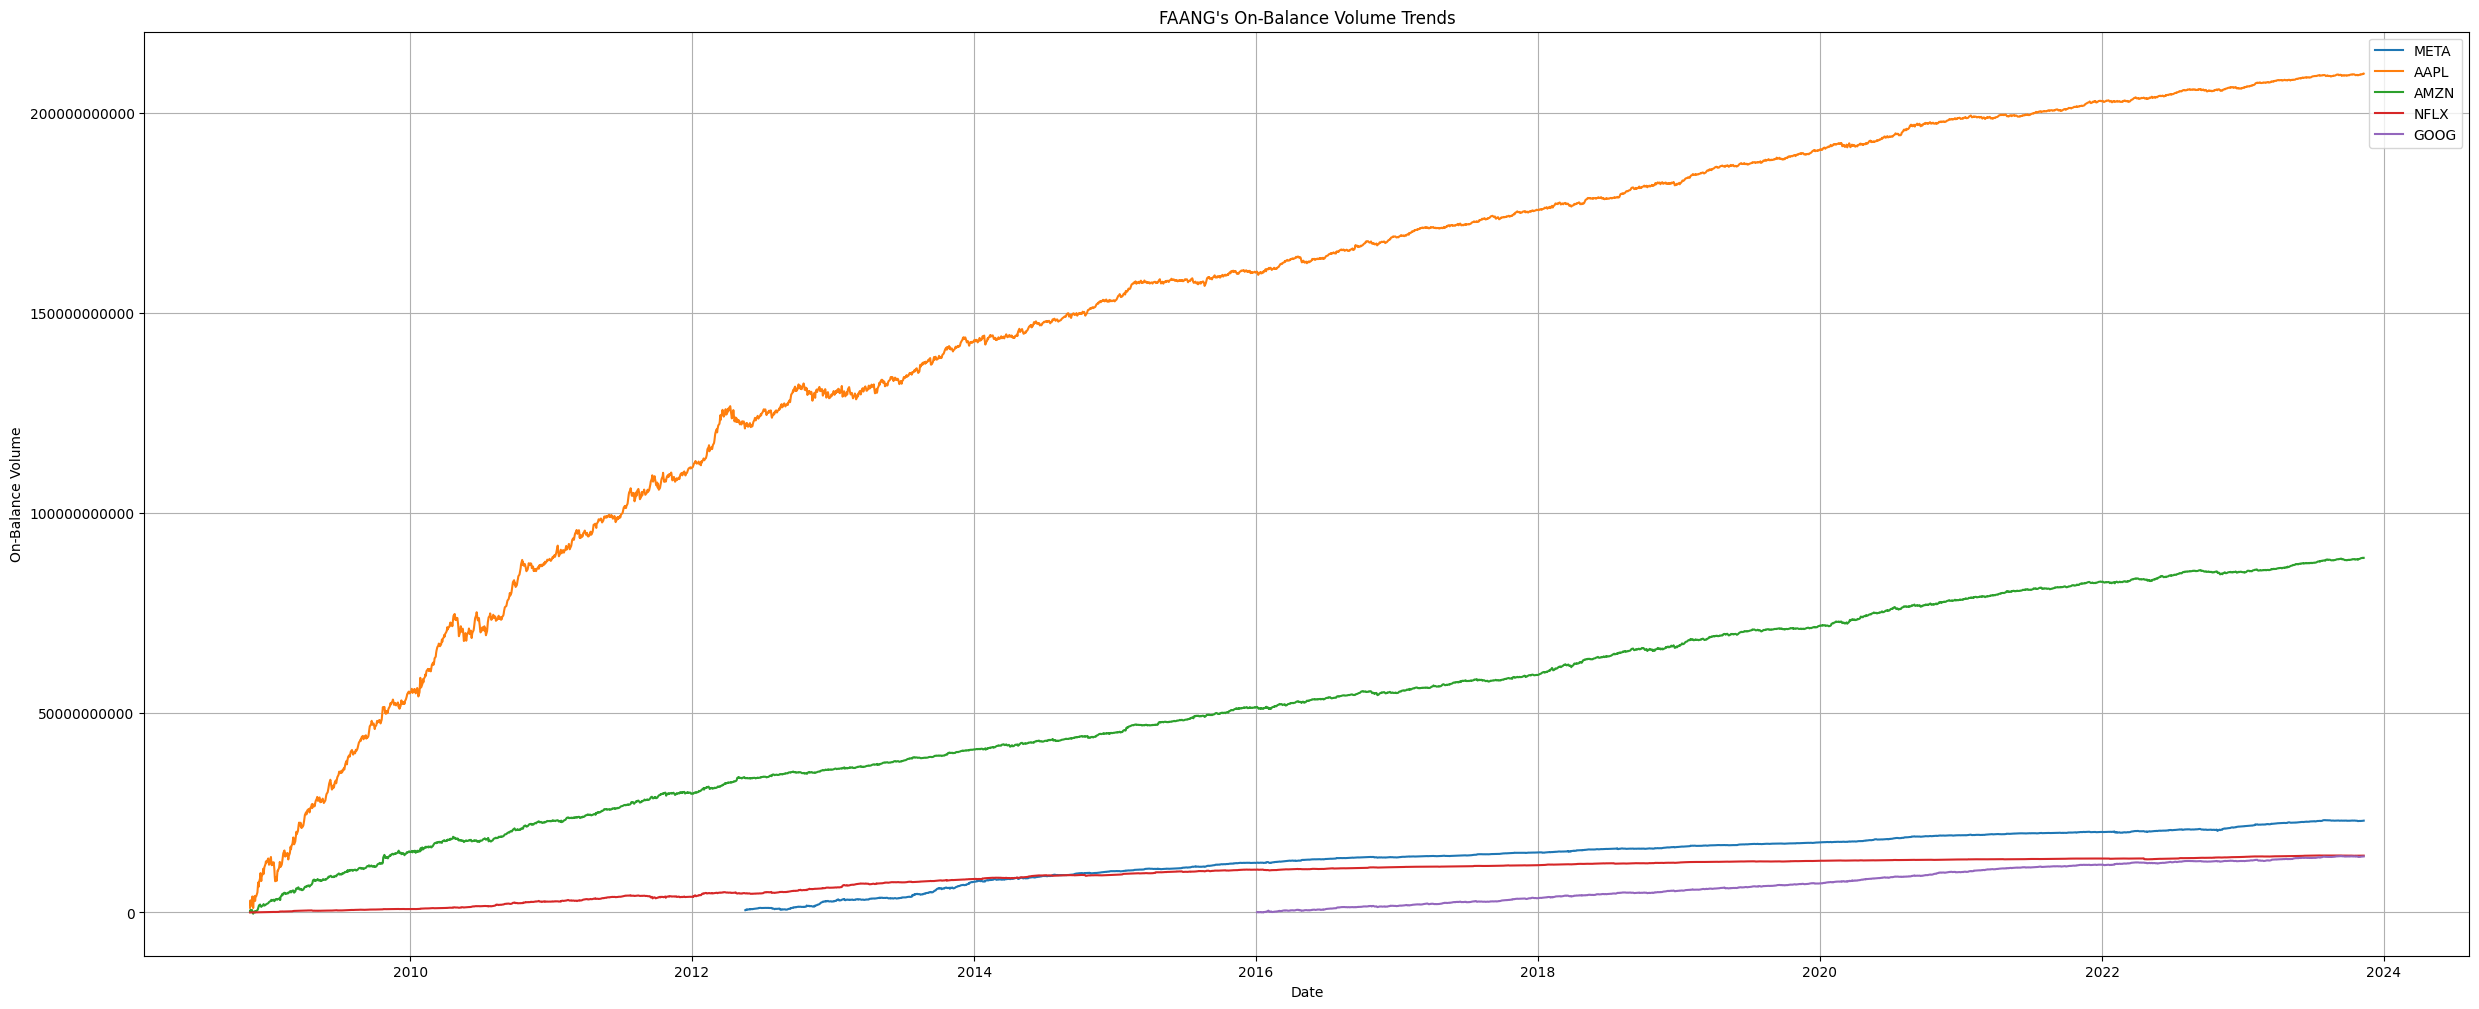

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Extracting OBV data for each company  
meta = obv[obv['symbol']=='META'][['priceDate','OBV']]
apple = obv[obv['symbol']=='AAPL'][['priceDate','OBV']]
amazon = obv[obv['symbol']=='AMZN'][['priceDate','OBV']]
netflix = obv[obv['symbol']=='NFLX'][['priceDate','OBV']]
google = obv[obv['symbol']=='GOOG'][['priceDate','OBV']]

# Creating lists to simplify visualization 
viz = [meta, apple, amazon, netflix, google]
labels = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

# Plotting the trends
plt.figure(figsize=(30,12))

for i in range(len(viz)):
    plt.plot(viz[i]['priceDate'], viz[i]['OBV'], label=labels[i])

plt.title("FAANG's On-Balance Volume Trends")
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Date')
plt.ylabel('On-Balance Volume')
plt.grid(True)
plt.legend()
plt.show()

As we can observe a rising trend in the OBV for all companies, we can conclude that thses companies' stocks are gaining popularity, with investors flowing in and propelling stock prices to higher levels. OBV can help traders confirm trends: if the price and OBV are rising, good trends will likely continue; however, if the price and OBV are moving in different directions, this divergence may indicate a potential reversal.

### 3.6 The Accumulation/Distribution (A/D) indicator

The Accumulation/Distribution (A/D) indicator is a tool used in technical analysis to evaluate the flow of money into or out of a security (like a stock). It combines price and volume data to assess whether a stock is being accumulated (bought) or distributed (sold) by investors.

The formula for the Accumulation/Distribution Indicator is:

$$ A/D = Previous A/D + Current Money Flow Volume $$


Where:

- Previous A/D is the previous period's (in this case daily) A/D value.
- Current Money Flow Volume is the volume multiplied by the Money Flow Multiplier.
- The Money Flow Multiplier (MFM) is calculated as follows: $MFM = \frac{\text{[(Close - Low) - (High - Close)]}}{{\text(High - Low)}}$

Where:

- Close is the closing price of the current period.
- High is the highest price during the current period.
- Low is the lowest price during the current period.

In [22]:
%%bigquery
SELECT symbol, pricedate,
       CASE
           WHEN ROW_NUMBER() OVER (ORDER BY priceDate) = 1 THEN 0
           ELSE 
               (((fclose - flow) - (fhigh - fclose)) / (fhigh - flow)) * fvolume
               + LAG((((fclose - flow) - (fhigh - fclose)) / (fhigh - flow) )* fvolume, 1, 0) OVER (ORDER BY priceDate)
       END AS ad
FROM `ba775-a10.fanng_portfolio_data.aapl_market_data`
ORDER BY pricedate

Query is running:   0%|          |

Downloading:   0%|          |

,symbol,pricedate,ad
0,AAPL,2008-11-12,0.000000e+00
1,AAPL,2008-11-13,7.563197e+08
2,AAPL,2008-11-14,6.206321e+08
3,AAPL,2008-11-17,-1.776333e+09
4,AAPL,2008-11-18,3.540301e+07
...,...,...,...
3775,AAPL,2023-11-06,1.279614e+08
3776,AAPL,2023-11-07,1.012704e+08
3777,AAPL,2023-11-08,6.494527e+07
3778,AAPL,2023-11-09,-6.251916e+06


In the case of apple on November 11th the money flow (weighted by the volume) into the security was way greater than on the previous day. This suggests stronger buying pressure compared to the preceding day, potentially indicating increased investor interest or bullish sentiment in the security.

### 3.7 FAANG Stock Price Volatility

Our primary objective is to ascertain the individual volatility of each portfolio company relative to the composite volatility of the FAANG portfolio. This analysis unveils nuanced insights into the comparative volatility levels of each stock within the FAANG grouping. By discerning which stocks exhibit higher or lower volatility than the portfolio average, traders can make more informed decisions regarding risk management and portfolio optimization, thereby enhancing their strategic positioning in the market.

In [23]:
sql = """
WITH StockReturns AS (
  SELECT
    key AS Ticker,
    priceDate AS Date,
    ABS(((fclose - LAG(fclose) OVER (PARTITION BY key ORDER BY priceDate)) / LAG(fclose) OVER (PARTITION BY key ORDER BY priceDate)) * 100) AS percent_change
  FROM
    ba775-a10.fanng_portfolio_data.faang_portfolio
)
SELECT
  Date,
  AVG(percent_change) AS overall_daily_change_abs
FROM
  StockReturns
GROUP BY
  Date
ORDER BY
  Date
"""
avg_percent_changes = client.query(sql).to_dataframe()
avg_percent_changes.head()


sql_per_ticker = """
SELECT
    key AS Ticker,
    priceDate AS Date,
    ABS(((fclose - LAG(fclose) OVER (PARTITION BY key ORDER BY priceDate)) / LAG(fclose) OVER (PARTITION BY key ORDER BY priceDate))) * 100 AS percent_change
FROM
    ba775-a10.fanng_portfolio_data.faang_portfolio
ORDER BY Date
"""
percent_changes_per_client = client.query(sql_per_ticker).to_dataframe()
percent_changes_per_client

,Ticker,Date,percent_change
0,AMZN,2008-11-12,NaN
1,NFLX,2008-11-12,NaN
2,AAPL,2008-11-12,NaN
3,AMZN,2008-11-13,8.108758
4,NFLX,2008-11-13,17.682865
...,...,...,...
16216,AMZN,2023-11-10,2.105263
16217,NFLX,2023-11-10,2.778352
16218,GOOG,2023-11-10,1.799681
16219,META,2023-11-10,2.564343


The query has resulted in an additional column that shows us the percent change in the closing prices each day for each stock. It would be easier to understand this with a visual. 

**Visualizing The Query**

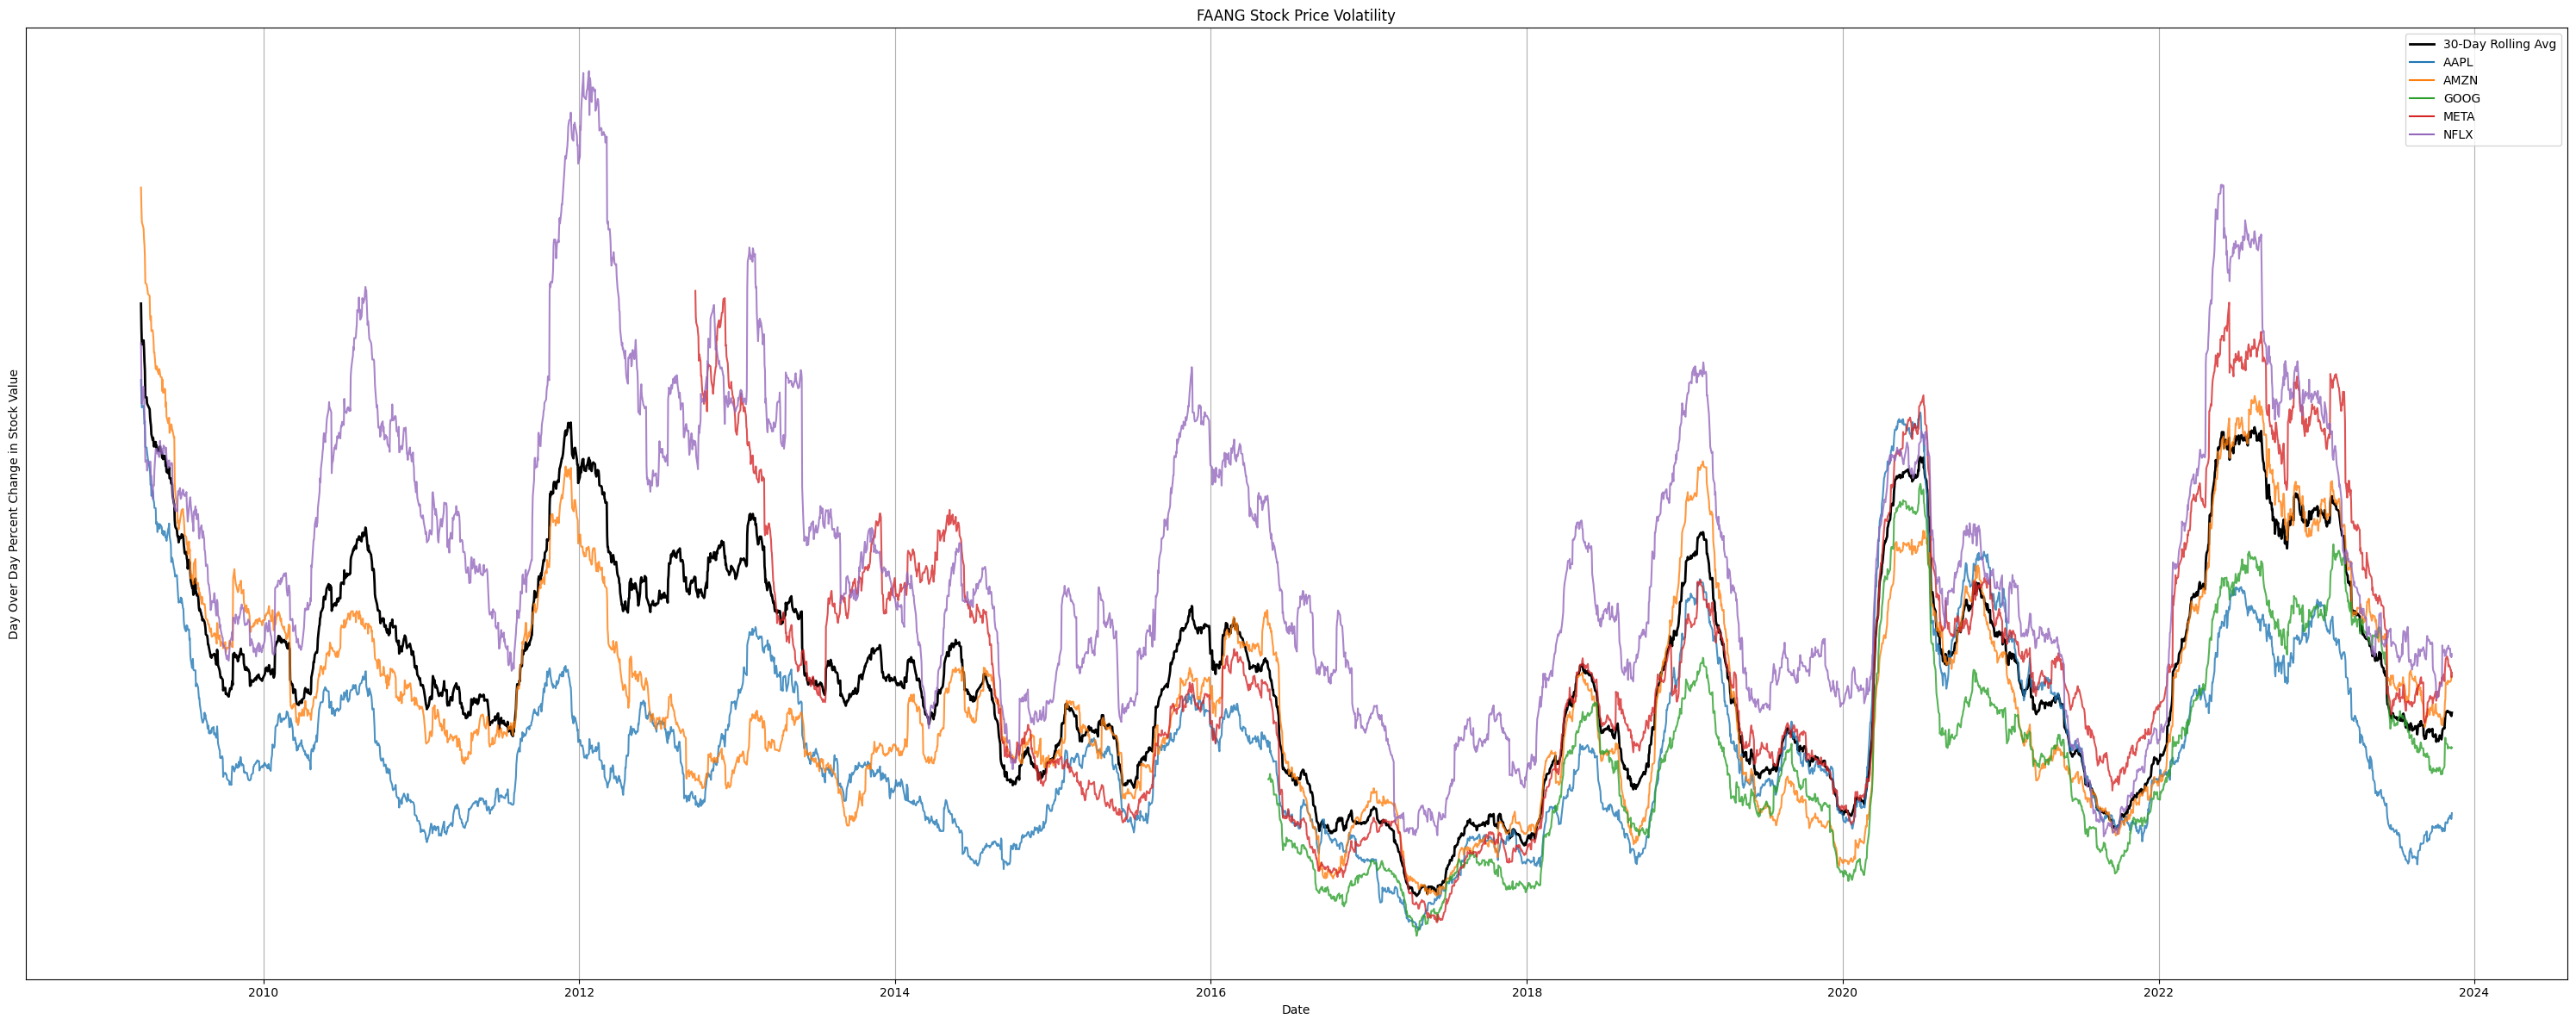

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns

# Calculate volume_chage
ROLLING_AVERAGE_WINDOW = 90


# Calculating the rolling average
avg_percent_changes = avg_percent_changes.sort_values(by=['Date'])
avg_percent_changes['thirty_day_rolling_avg'] = avg_percent_changes['overall_daily_change_abs'].rolling(window=ROLLING_AVERAGE_WINDOW).mean()

percent_changes_per_client = percent_changes_per_client.sort_values(by=['Ticker', 'Date'])
percent_changes_per_client['thirty_day_rolling_avg_per_client'] = percent_changes_per_client.groupby('Ticker')['percent_change'].rolling(window=ROLLING_AVERAGE_WINDOW).mean().reset_index(level=0, drop=True)


# Plotting the trends
fig, ax1 = plt.subplots(figsize=(30, 12))

# Plotting price trends
# plt.plot(avg_percent_changes['Date'], avg_percent_changes['overall_daily_change_abs'], label='Overall FAANG Percent Change Abs', alpha=0.8)
ax1.plot(avg_percent_changes['Date'], avg_percent_changes['thirty_day_rolling_avg'], label='30-Day Rolling Avg', color='black', linewidth=2)
sns.lineplot(x='Date', y='thirty_day_rolling_avg_per_client', hue='Ticker', data=percent_changes_per_client, alpha=0.8)

ax1.set_xlabel('Date')
ax1.set_ylabel('Day Over Day Percent Change in Stock Value')
ax1.set_title('FAANG Stock Price Volatility')
ax1.legend()
ax1.grid(True)
ax1.yaxis.set_major_locator(MultipleLocator(200))
# ax1.set_ylim(0,800)

# Adjust the padding between and around subplots.
plt.tight_layout()
plt.show()

As can be seen in the graph above, a few FAANG stocks such as NFLX and META were significantly more volatile than the rest of the FAANG portfolio in the 2011-2016 time period. From 2016-2018 all the FAANG portfolio stocks experienced a period of lower volatility. Around the time of the start of COVID-19 we can see that the stocks are a lot more volatile. Furthermore, NFLX and META are relatively not as volatile as before (compared to the other FAANG stocks) - presumably because COVID-19 was an event that had a similar effect on all FAANG stocks in terms of volatility. 

### 3.8 What are the highest and lowest closing price values for each stock within each year?

In [25]:
%%bigquery
SELECT symbol, EXTRACT(YEAR FROM priceDate) AS year, MAX(close) AS yearly_high, MIN(close) AS yearly_low
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio`
GROUP BY symbol, year
ORDER BY symbol, year;

Query is running:   0%|          |

Downloading:   0%|          |

,symbol,year,yearly_high,yearly_low
0,AAPL,2008,3.5736,2.8746
1,AAPL,2009,7.5586,2.7929
2,AAPL,2010,11.6239,6.8589
3,AAPL,2011,15.0800,11.2614
4,AAPL,2012,25.0750,14.6868
...,...,...,...,...
63,NFLX,2019,385.0300,254.5900
64,NFLX,2020,556.5500,298.8400
65,NFLX,2021,691.6900,484.9800
66,NFLX,2022,597.3700,166.3700


The query reveals the annual high and low closing price values for each stock in the FAANG portfolio. The query computes the maximum and minimum closing prices for each stock within each year. This analysis offers valuable insights into the price dynamics of individual stocks, allowing for the identification of annual trends, price extremities, and potential patterns in stock performance. Investors and analysts can use this information to make informed decisions, such as assessing the historical volatility of stocks, identifying potential entry or exit points, and gaining a comprehensive understanding of yearly price movements within the FAANG portfolio.

### 3.9 How do the daily price changes and subsequent day's price changes vary for each stock in the FAANG portfolio?

In [26]:
%%bigquery
SELECT symbol, priceDate, close, (close - LAG(close) OVER (PARTITION BY symbol ORDER BY priceDate)) AS price_change, LEAD(close, 1) OVER (PARTITION BY symbol ORDER BY priceDate) - close AS next_day_price_change
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio`
ORDER BY symbol, priceDate;

Query is running:   0%|          |

Downloading:   0%|          |

,symbol,priceDate,close,price_change,next_day_price_change
0,AAPL,2008-11-12,3.2186,NaN,0.2257
1,AAPL,2008-11-13,3.4443,0.2257,-0.2214
2,AAPL,2008-11-14,3.2229,-0.2214,-0.0750
3,AAPL,2008-11-17,3.1479,-0.0750,0.0632
4,AAPL,2008-11-18,3.2111,0.0632,-0.1293
...,...,...,...,...,...
16216,NFLX,2023-11-06,434.7400,2.3800,-0.1300
16217,NFLX,2023-11-07,434.6100,-0.1300,2.0400
16218,NFLX,2023-11-08,436.6500,2.0400,-1.5000
16219,NFLX,2023-11-09,435.1500,-1.5000,12.0900


The query evaluates the daily price changes and next day's price changes for each stock in the FAANG portfolio by computing the difference between consecutive closing prices. Positive values in the "price_change" column indicate daily price increases, while negative values signify decreases. This query helps to understand how today's closing price compares to the following day's, providing an indication of potential momentum or reversal. From the above results, it can be observed that Netflix's stock performance has been fluctuating quite a bit in the recent data.

### 3.10 How have the closing prices and trading volumes for each stock in the FAANG portfolio changed over a five-day period

In [4]:
%%bigquery
SELECT symbol, priceDate, close, volume, LAG(close, 5) OVER (PARTITION BY symbol ORDER BY priceDate) AS five_days_ago_close, LAG(volume, 5) OVER (PARTITION BY symbol ORDER BY priceDate) AS five_days_ago_volume
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio`
ORDER BY symbol, priceDate;

Query is running:   0%|          |

Downloading:   0%|          |

,symbol,priceDate,close,volume,five_days_ago_close,five_days_ago_volume
0,AAPL,2008-11-12,3.2186,1.178928e+09,NaN,NaN
1,AAPL,2008-11-13,3.4443,1.855362e+09,NaN,NaN
2,AAPL,2008-11-14,3.2229,1.405279e+09,NaN,NaN
3,AAPL,2008-11-17,3.1479,1.162924e+09,NaN,NaN
4,AAPL,2008-11-18,3.2111,1.210354e+09,NaN,NaN
...,...,...,...,...,...,...
16216,NFLX,2023-11-06,434.7400,3.003235e+06,410.08,5317147.0
16217,NFLX,2023-11-07,434.6100,3.291064e+06,411.69,3877623.0
16218,NFLX,2023-11-08,436.6500,2.356845e+06,420.19,4806108.0
16219,NFLX,2023-11-09,435.1500,2.735507e+06,424.71,4475984.0


The query provides a comparative analysis of closing prices and trading volumes for each stock symbol in the FAANG portfolio, highlighting changes over a five-day period. From the above result, it can be observed that Netflix has done well five days ago, keeping in mind a few minor fluctuations. Examining these values facilitates the identification of patterns, potential market shifts, and assists in understanding the historical dynamics of stock price movements and associated trading volumes.

### 3.11 FAANG Stock Performance After Hours VS. Regular Hours

Comparing after-hours trading prices with regular (or "during hours") trading prices can provide traders and investors with several potential benefits such as gauging how new information or developments impact a stock's value before the next trading day, or identify potential gaps and assess their implications for the next trading session. 

In [32]:
sql = """
  SELECT
    key AS Ticker,
    priceDate AS Date,
    fclose - fopen AS RegularHours, 
    fopen - LAG(fclose) OVER (PARTITION BY key ORDER BY priceDate) AS AfterHours
  FROM
    ba775-a10.fanng_portfolio_data.faang_portfolio
    ORDER BY priceDate
"""
AfterHoursVSRegularTrading = client.query(sql).to_dataframe()
AfterHoursVSRegularTrading

,Ticker,Date,RegularHours,AfterHours
0,AMZN,2008-11-12,-0.1215,NaN
1,NFLX,2008-11-12,-0.1486,NaN
2,AAPL,2008-11-12,-0.0718,NaN
3,AMZN,2008-11-13,0.1765,-0.0080
4,NFLX,2008-11-13,0.5457,-0.0228
...,...,...,...,...
16216,AMZN,2023-11-10,3.1000,-0.1400
16217,NFLX,2023-11-10,9.7600,2.3300
16218,GOOG,2023-11-10,2.5300,-0.1600
16219,META,2023-11-10,8.8300,-0.6100


The way a trader would infer this would be, for example, on November 10 2023 the AAPL stock increased by 2.4 dollars from when the stock market opened to when it closed, and after hours it increased by $2 again. Similar to NFLX where it increased by 9.7 dollars during the day but after hours increased by 2.33 dollars. META on the other hand increased by 8.8 dollars during the day but after hours decreased by 0.6 dollars. This information is helpful because if a stock is exhibiting significant price movements after hours than it may be either opportune or too risky for a trader. Since some releases and earnings news happen after hours, it also shows what the sentiment is of the market during that time to prepare traders better. Now let's look at which portfolio companies had the largest change in stock price after hours:

### 3.12 What is the best day of our portfolio and who was the driver?

Understanding the best-performing day assists in establishing realistic goals and benchmarks for our portfolio. It serves as a reference point for tracking progress, allowing us to determine if our investments align with expectations. Identifying the stock that drove this performance can guide decisions regarding the percentage allocation of our portfolio to different stocks. This insight helps in determining the optimal exposure to individual stocks relative to others, aiding in portfolio diversification and risk management.

In [2]:
%%bigquery
SELECT priceDate, portfolio_daily_percent_change
FROM `ba775-a10.fanng_portfolio_data.portfolio_trend`
ORDER BY portfolio_daily_percent_change DESC
LIMIT 1;

Query is running:   0%|          |

Downloading:   0%|          |

,priceDate,portfolio_daily_percent_change
0,2021-01-20,9.44


In [34]:
%%bigquery
SELECT
    priceDate, 
    symbol,
    ROUND(((fclose - LAG(fclose, 1) OVER (ORDER BY symbol, priceDate)) / LAG(fclose, 1) OVER (ORDER BY symbol, priceDate)) * 100, 2) AS percent_change
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio`
WHERE priceDate BETWEEN '2021-01-19' AND '2021-01-20'
ORDER BY priceDate DESC, percent_change DESC
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,priceDate,symbol,percent_change
0,2021-01-20,NFLX,16.85
1,2021-01-20,GOOG,5.36
2,2021-01-20,AMZN,4.57
3,2021-01-20,AAPL,3.29
4,2021-01-20,META,2.44


The best day for our portfolio was January 20th, 2021, experiencing a growth of 9.44 percent from the previous day. Netflix emerged as the bull of the day within our portfolio, leading with a remarkable +16.85% increase. As we saw previously (4.5), Netflix has consistently exhibited the highest volatility within our portfolio, indicating its potential to be both the driving force behind upward momentum and the factor contributing to downturns.

### 3.13 What is the worst day of our portfolio and who was the driver?

Understanding our bottom benchmark, particularly examining the worst-performing day and its driver, as outlined in the previous question (4.7), is equally crucial. 

In [35]:
%%bigquery
SELECT priceDate, portfolio_daily_percent_change
FROM `ba775-a10.fanng_portfolio_data.portfolio_trend`
ORDER BY portfolio_daily_percent_change
LIMIT 1;

Query is running:   0%|          |

Downloading:   0%|          |

,priceDate,portfolio_daily_percent_change
0,2022-04-20,-14.31


In [36]:
%%bigquery
SELECT
    priceDate, 
    symbol,
    ROUND(((fclose - LAG(fclose, 1) OVER (ORDER BY symbol, priceDate)) / LAG(fclose, 1) OVER (ORDER BY symbol, priceDate)) * 100, 2) AS percent_change
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio`
WHERE priceDate BETWEEN '2022-04-19' AND '2022-04-20'
ORDER BY priceDate DESC, percent_change
LIMIT 5;

Query is running:   0%|          |

Downloading:   0%|          |

,priceDate,symbol,percent_change
0,2022-04-20,NFLX,-35.12
1,2022-04-20,META,-7.77
2,2022-04-20,AMZN,-2.60
3,2022-04-20,GOOG,-1.75
4,2022-04-20,AAPL,-0.10


The worst day for our portfolio occurred on April 20th, 2022, and once again, Netflix was the primary driver, experiencing a negative performance of -35.12%. This confirms how Netflix's volatility can significantly influence both the best and worst days within our portfolio.

### 3.14 What would the final value of a $100,000 investment in the FAANG portfolio be?

In [37]:
%%bigquery
SELECT 
    100000 AS initial_investment,
    ROUND(
        (100000 /
        (SELECT portfolio_open 
        FROM `ba775-a10.fanng_portfolio_data.portfolio_trend` 
        WHERE priceDate = '2016-01-04')) *
        (SELECT portfolio_open
         FROM `ba775-a10.fanng_portfolio_data.portfolio_trend`
        WHERE priceDate = '2023-11-10'), 2
    ) AS final_value,
    ROUND(
        (((100000 /
        (SELECT portfolio_open 
        FROM `ba775-a10.fanng_portfolio_data.portfolio_trend` 
        WHERE priceDate = '2016-01-04')) *
        (SELECT portfolio_open
         FROM `ba775-a10.fanng_portfolio_data.portfolio_trend`
        WHERE priceDate = '2023-11-10')) - 100000) / 100000 * 100, 2
    ) AS percentage_change


Query is running:   0%|          |

Downloading:   0%|          |

,initial_investment,final_value,percentage_change
0,100000,398882.31,298.88


If we had invested USD 100,000 on January 4th, 2016, the value of that investment as of November 10th, 2023, would have reached USD 398882.31, marking a staggering percentage change of 298.88%. It's crucial to note that the FAANG portfolio comprises the top-performing tech stocks, which have witnessed tremendous growth over the last decade.

### 3.15 How do technical indicators influence the Closing Price of a stock?

The same query has been executed for the other company stocks and placed in Appendix.

In [6]:
%%bigquery
SELECT 
    corr(stocks.CLOSE, ind1.AROON_OSC) AS corr_Aroon, 
    corr(stocks.CLOSE, ind1.MACD_Line) AS corr_MacdLine,
    corr(stocks.CLOSE, ind1.Signal_Line) AS corr_Signal, 
    corr(stocks.CLOSE, ind1.MACD_Histogram) AS corr_Hist, 
    corr(stocks.CLOSE, ind1.Stochastic__K) AS corr_K, 
    corr(stocks.CLOSE, ind1.Stochastic__D) AS corr_D,
    corr(stocks.CLOSE, ind2.AD) AS corr_AD,
    corr(stocks.CLOSE, ind2.OBV) AS corr_OBV,
    corr(stocks.CLOSE, ind2.RSI) AS corr_RSI,
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS stocks
JOIN `ba775-a10.fanng_portfolio_data.faang_market_ind` AS ind1 
ON stocks.PRICEDATE = ind1.PRICEDATE AND stocks.SYMBOL = ind1.SYMBOL
JOIN `ba775-a10.fanng_portfolio_data.faang_new_ind` AS ind2
ON stocks.PRICEDATE = ind2.PRICE_DATE AND stocks.SYMBOL = ind2.SYMBOL_TEMP
WHERE stocks.SYMBOL = 'AAPL' AND EXTRACT(YEAR FROM stocks.PRICEDATE) BETWEEN 2008 AND 2023;

Query is running:   0%|          |

Downloading:   0%|          |

,corr_Aroon,corr_MacdLine,corr_Signal,corr_Hist,corr_K,corr_D,corr_AD,corr_OBV,corr_RSI
0,-0.003239,0.216663,0.229696,0.002858,-0.014688,-0.016437,-0.018184,0.729961,-0.027554


The above query results reveals relationships between the indicators and the closing price of Apple stocks. Specifically, the Aroon Oscillator, Stochastic Oscillator, Accumulation/Distribution, and Relative Strength Index exhibit weak and negative linear associations with the closing price. This implies that an increase in the values of these indicators is correlated with a decrease in the closing price. On the other hand, both the MACD and On-Balance Volume (OBV) show positive linear relationships with the closing price. While the relationship with MACD is weak, the relationship with OBV is strong, suggesting that an increase in OBV is positively associated with an increase in the closing price of the stock.

### 3.16 Which are the top 5 FAANG stocks that experienced the largest absolute changes in stock price during after-hours trading?

In [7]:
from google.cloud import bigquery
client = bigquery.Client()
sql = """
WITH AfterHoursVSRegularTrading AS
(
  SELECT
    key AS Ticker,
    priceDate AS Date,
    fclose - fopen AS RegularHours, 
    fopen - LAG(fclose) OVER (PARTITION BY key ORDER BY priceDate) AS AfterHours
  FROM
    ba775-a10.fanng_portfolio_data.faang_portfolio
    ORDER BY priceDate
)
SELECT Ticker, Date, AfterHours
FROM AfterHoursVSRegularTrading
ORDER BY ABS(AfterHours) DESC
LIMIT 5;
"""
AfterHoursChange = client.query(sql).to_dataframe()
AfterHoursChange

,Ticker,Date,AfterHours
0,NFLX,2022-01-21,-107.825
1,NFLX,2022-04-20,-103.410
2,META,2022-02-03,-78.355
3,NFLX,2021-01-20,63.650
4,NFLX,2023-10-19,58.550


It looks like Netflix's after hours stock price change were affected heavily consistently around the time of some of their earnings calls. When I saw the dates of the top 5 changes, I had to look up when their earning call was, and it was right around the time of the dates presented in the table. Since earnings calls happen quarterly, the dates of January, April, and October all make sense and are in line with the earnings call dates. We also see a huge change for Meta in Feb of 2022, after doing some research, it appears that this happened after a discouraging forecast of Facebook's earnings, which the company blamed on Apple's privacy changes and increased competition.

### 3.17 Which are the top 5 FAANG stocks that experienced the largest absolute changes in stock price during trading hours?

In [19]:
from google.cloud import bigquery
client = bigquery.Client()
sql = """
WITH RegularTradingVSAfterHours AS
(
  SELECT
    key AS Ticker,
    priceDate AS Date,
    fclose - fopen AS RegularHours, 
    fopen - LAG(fclose) OVER (PARTITION BY key ORDER BY priceDate) AS AfterHours
  FROM
    ba775-a10.fanng_portfolio_data.faang_portfolio
    ORDER BY priceDate
)
SELECT Ticker, Date, RegularHours
FROM RegularTradingVSAfterHours
ORDER BY ABS(RegularHours) DESC
LIMIT 5;
"""
DuringHoursChange = client.query(sql).to_dataframe()
DuringHoursChange

,Ticker,Date,RegularHours
0,NFLX,2020-08-26,55.03
1,NFLX,2020-07-13,-42.48
2,NFLX,2022-02-24,34.94
3,NFLX,2018-07-17,32.53
4,NFLX,2021-12-01,-31.71


It seem's that all of the top 5 largest absolute value changes in stock hours DURING trading hours happened for Netflix. If we do a deeper dive into each instance, we can explain what happens, for example:

On August 26 2020, Netflix added an unprecedented 25.86 million subscriber in the first half of 2020 which was announced on this day. The largest drop just a month before happened after their Q2 earnings call. On February 24 2022, Netflix had announced a low subscriber growth. 

These are just examples but traders could easily use this to pin point exactly when significant events took place during trading hours. 

### 3.18 Based on Aroon Oscillator indicator values, what suggestion can be given to traders about a particular stock?

This query can be separately executed for all the other company's stocks by replacing the value for Symbol in the where statement with 'AMZN', 'NFLX', 'GOOG', or 'META'.

In [5]:
%%bigquery
WITH SignalData AS (
    SELECT
        SYMBOL,
        PRICEDATE,
        AROON_OSC,
        LAG(AROON_OSC, 1) OVER (PARTITION BY SYMBOL ORDER BY PRICEDATE) AS prev_aroon_osc
    FROM
        `ba775-a10.fanng_portfolio_data.faang_market_ind`
    WHERE
        SYMBOL = 'AAPL'
        AND EXTRACT(YEAR FROM PRICEDATE) BETWEEN 2008 AND 2023
)
SELECT
    SYMBOL,
    PRICEDATE,
    AROON_OSC,
    prev_aroon_osc,
    CASE
        WHEN AROON_OSC > 0 AND prev_aroon_osc <= 0 THEN 'Buy Signal'
        WHEN AROON_OSC < 0 AND prev_aroon_osc >= 0 THEN 'Sell Signal'
        ELSE 'No Signal'
    END AS signal
FROM
    SignalData
ORDER BY
    PRICEDATE;

Query is running:   0%|          |

Downloading:   0%|          |

,SYMBOL,PRICEDATE,AROON_OSC,prev_aroon_osc,signal
0,AAPL,2008-12-23,-80,<NA>,No Signal
1,AAPL,2008-12-24,-100,-80,No Signal
2,AAPL,2008-12-26,-60,-100,No Signal
3,AAPL,2008-12-29,-60,-60,No Signal
4,AAPL,2008-12-30,-40,-60,No Signal
...,...,...,...,...,...
3747,AAPL,2023-11-06,80,80,No Signal
3748,AAPL,2023-11-07,100,80,No Signal
3749,AAPL,2023-11-08,100,100,No Signal
3750,AAPL,2023-11-09,80,100,No Signal


The above query utilizes the Aroon Oscillator to guide traders in making informed decisions about buying, selling, or holding a company's stock. By analyzing the Aroon Oscillator values for every trading day, the signals are generated based on the comparison of the current day's value with the previous day's. A positive change triggers a 'Buy Signal,' suggesting a potential upward trend, while a negative change prompts a 'Sell Signal,' indicating a possible downward shift. Instances where there is no significant change result in a 'No Signal,' signifying a neutral market condition. This approach empowers traders to strategically manage their stock positions in response to identified trends or shifts in the market.

### 3.19 How can traders benefit from analyzing the short-term and long-term moving averages of a company's stock over a specific period of time?

This query can be separately executed for all the other company's stocks by replacing the value for Symbol in the where statement with 'AMZN', 'NFLX', 'GOOG', or 'META'.

In [6]:
%%bigquery
WITH SignalData AS (
    SELECT
        SYMBOL,
        PRICEDATE,
        CLOSE,
        AVG(CLOSE) OVER (PARTITION BY SYMBOL ORDER BY PRICEDATE ROWS BETWEEN 10 PRECEDING AND CURRENT ROW) AS short_term_ma,
        AVG(CLOSE) OVER (PARTITION BY SYMBOL ORDER BY PRICEDATE ROWS BETWEEN 30 PRECEDING AND CURRENT ROW) AS long_term_ma
    FROM
        `ba775-a10.fanng_portfolio_data.faang_portfolio`
    WHERE
        SYMBOL = 'AAPL'
        AND EXTRACT(YEAR FROM PRICEDATE) BETWEEN 2008 AND 2023
)
SELECT
    SYMBOL,
    PRICEDATE,
    CLOSE,
    CASE
        WHEN short_term_ma > long_term_ma AND LAG(short_term_ma, 1) OVER (PARTITION BY SYMBOL ORDER BY PRICEDATE) <= LAG(long_term_ma, 1) OVER (PARTITION BY SYMBOL ORDER BY PRICEDATE) THEN 'Golden Cross'
        WHEN short_term_ma < long_term_ma AND LAG(short_term_ma, 1) OVER (PARTITION BY SYMBOL ORDER BY PRICEDATE) >= LAG(long_term_ma, 1) OVER (PARTITION BY SYMBOL ORDER BY PRICEDATE) THEN 'Death Cross'
        ELSE 'No Signal'
    END AS signal
FROM
    SignalData
ORDER BY
    PRICEDATE;

Query is running:   0%|          |

Downloading:   0%|          |

,SYMBOL,PRICEDATE,CLOSE,signal
0,AAPL,2008-11-12,3.2186,No Signal
1,AAPL,2008-11-13,3.4443,No Signal
2,AAPL,2008-11-14,3.2229,No Signal
3,AAPL,2008-11-17,3.1479,No Signal
4,AAPL,2008-11-18,3.2111,No Signal
...,...,...,...,...
3775,AAPL,2023-11-06,179.2300,No Signal
3776,AAPL,2023-11-07,181.8200,No Signal
3777,AAPL,2023-11-08,182.8900,No Signal
3778,AAPL,2023-11-09,182.4100,Golden Cross


The above query interprets the short-term and long-term moving averages of a company's stocks. By assessing the events, Golden Cross and Death Cross, traders can estimate the potential shifts in the market situations. Instances of Golden Cross, where the short-term moving average surpasses the long-term moving average, may indicate a bullish trend, encouraging traders to consider buying or holding positions. Conversely, Death Cross events, signifying the short-term moving average falling below the long-term moving average, may suggest a bearish trend, prompting traders to evaluate selling strategies. This provides the traders a chance to make an informed decision on what to do with their stocks.

### 3.20 Merging Newly Created Indicators to Master Table

In [38]:
%%bigquery

CREATE OR REPLACE TABLE `ba775-a10.fanng_portfolio_data.faang_new_ind` AS

SELECT aapl_rsi.RSI AS rsi, aapl_rolling_avg.thirty_day_rolling_avg AS thirty_day_rolling_avg, aapl_ad.ad, aapl_obv.OBV AS obv,portfolio_market_data.symbol AS symbol_temp, portfolio_market_data.priceDate AS price_date
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS portfolio_market_data
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AAPL_RSI` AS aapl_rsi
ON portfolio_market_data.symbol = aapl_rsi.key
AND portfolio_market_data.priceDate = aapl_rsi.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AAPL_ROLLING_AVG` AS aapl_rolling_avg
ON portfolio_market_data.symbol = aapl_rolling_avg.symbol
AND portfolio_market_data.priceDate = aapl_rolling_avg.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AAPL_AD` AS aapl_ad
ON portfolio_market_data.symbol = aapl_ad.symbol
AND portfolio_market_data.priceDate = aapl_ad.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AAPL_OBV` AS aapl_obv
ON portfolio_market_data.symbol = aapl_obv.symbol
AND portfolio_market_data.priceDate = aapl_obv.priceDate
WHERE aapl_rolling_avg.thirty_day_rolling_avg IS NOT NULL 
  OR aapl_rsi.RSI IS NOT NULL 
  OR aapl_ad.ad IS NOT NULL 
  OR aapl_obv.OBV IS NOT NULL 


UNION ALL

SELECT amzn_rsi.RSI AS rsi, amzn_rolling_avg.thirty_day_rolling_avg AS thirty_day_rolling_avg, amzn_ad.ad, amzn_obv.OBV AS obv,portfolio_market_data.symbol AS symbol_temp, portfolio_market_data.priceDate AS price_date
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS portfolio_market_data
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AMZN_RSI` AS amzn_rsi
ON portfolio_market_data.symbol = amzn_rsi.key
AND portfolio_market_data.priceDate = amzn_rsi.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AMZN_ROLLING_AVG` AS amzn_rolling_avg
ON portfolio_market_data.symbol = amzn_rolling_avg.symbol
AND portfolio_market_data.priceDate = amzn_rolling_avg.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AMZN_AD` AS amzn_ad
ON portfolio_market_data.symbol = amzn_ad.symbol
AND portfolio_market_data.priceDate = amzn_ad.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.AMZN_OBV` AS amzn_obv
ON portfolio_market_data.symbol = amzn_obv.symbol
AND portfolio_market_data.priceDate = amzn_obv.priceDate
WHERE 
  amzn_rolling_avg.thirty_day_rolling_avg IS NOT NULL
  OR amzn_rsi.RSI IS NOT NULL
  OR amzn_ad.ad IS NOT NULL
  OR amzn_obv.OBV IS NOT NULL


UNION ALL

SELECT 
goog_rsi.RSI AS rsi, 
goog_rolling_avg.thirty_day_rolling_avg AS thirty_day_rolling_avg, 
goog_ad.ad, goog_obv.OBV AS obv,portfolio_market_data.symbol AS symbol_temp, 
portfolio_market_data.priceDate AS price_date
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS portfolio_market_data
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.GOOG_RSI` AS goog_rsi
ON portfolio_market_data.symbol = goog_rsi.key
AND portfolio_market_data.priceDate = goog_rsi.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.GOOG_ROLLING_AVG` AS goog_rolling_avg
ON portfolio_market_data.symbol = goog_rolling_avg.symbol
AND portfolio_market_data.priceDate = goog_rolling_avg.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.GOOG_AD` AS goog_ad
ON portfolio_market_data.symbol = goog_ad.symbol
AND portfolio_market_data.priceDate = goog_ad.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.GOOG_OBV` AS goog_obv
ON portfolio_market_data.symbol = goog_obv.symbol
AND portfolio_market_data.priceDate = goog_obv.priceDate
WHERE 
  goog_rolling_avg.thirty_day_rolling_avg IS NOT NULL
  OR goog_rsi.RSI IS NOT NULL
  OR goog_ad.ad IS NOT NULL
  OR goog_obv.OBV IS NOT NULL



UNION ALL

SELECT meta_rsi.RSI AS rsi, meta_rolling_avg.thirty_day_rolling_avg AS thirty_day_rolling_avg, meta_ad.ad, meta_obv.OBV AS obv,portfolio_market_data.symbol AS symbol_temp, portfolio_market_data.priceDate AS price_date
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS portfolio_market_data
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.META_RSI` AS meta_rsi
ON portfolio_market_data.symbol = meta_rsi.key
AND portfolio_market_data.priceDate = meta_rsi.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.META_ROLLING_AVG` AS meta_rolling_avg
ON portfolio_market_data.symbol = meta_rolling_avg.symbol
AND portfolio_market_data.priceDate = meta_rolling_avg.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.META_AD` AS meta_ad
ON portfolio_market_data.symbol = meta_ad.symbol
AND portfolio_market_data.priceDate = meta_ad.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.META_OBV` AS meta_obv
ON portfolio_market_data.symbol = meta_obv.symbol
AND portfolio_market_data.priceDate = meta_obv.priceDate
WHERE 
  meta_rolling_avg.thirty_day_rolling_avg IS NOT NULL
  OR meta_rsi.RSI IS NOT NULL
  OR meta_ad.ad IS NOT NULL
  OR meta_obv.OBV IS NOT NULL


UNION ALL

SELECT nflx_rsi.RSI AS rsi, nflx_rolling_avg.thirty_day_rolling_avg AS thirty_day_rolling_avg, nflx_ad.ad, nflx_obv.OBV AS obv,portfolio_market_data.symbol AS symbol_temp, portfolio_market_data.priceDate AS price_date
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS portfolio_market_data
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.NFLX_RSI` AS nflx_rsi
ON portfolio_market_data.symbol = nflx_rsi.key
AND portfolio_market_data.priceDate = nflx_rsi.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.NFLX_ROLLING_AVG` AS nflx_rolling_avg
ON portfolio_market_data.symbol = nflx_rolling_avg.symbol
AND portfolio_market_data.priceDate = nflx_rolling_avg.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.NFLX_AD` AS nflx_ad
ON portfolio_market_data.symbol = nflx_ad.symbol
AND portfolio_market_data.priceDate = nflx_ad.priceDate
LEFT JOIN `ba775-a10.fanng_portfolio_indicators.NFLX_OBV` AS nflx_obv
ON portfolio_market_data.symbol = nflx_obv.symbol
AND portfolio_market_data.priceDate = nflx_obv.priceDate
WHERE 
  nflx_rolling_avg.thirty_day_rolling_avg IS NOT NULL
  OR nflx_rsi.RSI IS NOT NULL
  OR nflx_ad.ad IS NOT NULL
  OR nflx_obv.OBV IS NOT NULL

ORDER BY price_date;

Query is running:   0%|          |

""


In [15]:
%%bigquery
ALTER TABLE `ba775-a10.fanng_portfolio_data.faang_market_ind`
ADD COLUMN rsi FLOAT64,
ADD COLUMN thirty_day_rolling_avg FLOAT64,
ADD COLUMN ad FLOAT64,
ADD COLUMN obv FLOAT64;

UPDATE `ba775-a10.fanng_portfolio_data.faang_market_ind`
SET 
  rsi= `ba775-a10.fanng_portfolio_data.faang_new_ind`.rsi,
thirty_day_rolling_avg = `ba775-a10.fanng_portfolio_data.faang_new_ind`.thirty_day_rolling_avg,
ad = `ba775-a10.fanng_portfolio_data.faang_new_ind`.ad,
obv = `ba775-a10.fanng_portfolio_data.faang_new_ind`.obv
FROM `ba775-a10.fanng_portfolio_data.faang_new_ind`
WHERE `ba775-a10.fanng_portfolio_data.faang_market_ind`.symbol = `ba775-a10.fanng_portfolio_data.faang_new_ind`.symbol_temp
AND `ba775-a10.fanng_portfolio_data.faang_market_ind`.price_date = `ba775-a10.fanng_portfolio_data.faang_new_ind`.price_date 

Query is running:   0%|          |

""


Here we update the master table we created with the four newly created indicators: rsi, 30d rolling, ad, and obv. 

## 4. Tableau Dashboards

The below dashboard depicts the historical stock price analysis for companies Apple, Amazon, Google, Meta and Netflix for a stipulated period of time.

![FAANG Portfolio Analysis](https://github.com/neeharika59/BA775/blob/main/Screenshot%202023-12-10%20at%2022.58.23.png?raw=true)

The below dashboard represents the historical technical indicator values, Moving Average Convergence Divergence, On-Balance Volume, Accumulation/Distribution and Relative Strength Index of Apple, Amazon, Google, Meta and Netflix.

![FAANG Technical Indicators Analysis](https://github.com/neeharika59/BA775/blob/main/Screenshot%202023-12-11%20at%2012.09.03%20PM.png?raw=true)

## 5. Conclusions and Challenges

### 5.1 Conclusion

1. The mean and the median imply that each company has largely maintained its relative standing over the 15-year period, but META has emerged as the top performer. Among the FAANG stocks, Google's performance has been the most stable, while Netflix's has shown the highest degree of volatility.
2. Through the basic statistical analysis of techical indicators of Aroon Osciallator, Moving average convergence divergence and Stochastic Oscillator, it can be observed all the stocks have a positive uptrend during most situations in the time period.
3. Overbought or Oversold column helps to understand the value of the stock in the current market.
4. Beginning on November 12, 2008, Netflix stock embarked on a generally upward trajectory, culminating in a peak on November 30, 2021.
12. Netflix's stock has been fluctuating in the days within 6th November 2023 and 10th November 2023.
13. However, Netflix was doing well in the five days prior to the above mentioned period.
5. Through the calculation of cumulative trade volume, On-Balance Volume (OBV) shows the increasing popularity of FAANG stocks, potentially pushing their prices to higher levels. If both the price and OBV continue to rise, there is a strong likelihood that positive trends will persist.
6. The flow of money into the five securities tends to stabilize in the final part of the period under consideration. Amazon, and especially Apple, exhibit significant fluctuations between 2008 and 2015, which later stabilize.
7. When evaluating the individual stock volatility compared to the 30 day rolling average for the entire portfolio, certain stocks, notably NFLX and META, exhibited higher volatility in the 2011-2016 period, followed by a general decrease in volatility across all FAANG stocks from 2016-2018. The start and duration of COVID-19 led to increased volatility for all FAANG stocks, with NFLX and META showing relatively lower volatility during this period, suggesting a common impact on the volatility of all FAANG stocks.
8. Comparing after-hours and regular trading prices allows traders to assess the impact of new information on a stock's value before the next trading day, helping identify potential opportunities or risks, particularly useful when significant price movements occur after hours due to releases or earnings news.
9. Specifically, for example, they are now able to see the top 5 portfolios that had the biggest change in stock price after trading hours. This ended up being Meta for 4/5 of the biggest change, often during the time of their earnings change. We also found the largest absolute changes in stock price DURING trading hours, all of which were Netflix. Through some research we are able to see that those instances are directly correlated with earnings calls/impactful company growth news.
9. We can expect a fluctuation of the portfolio within a maximum +9.44% of and a minimum of -14.31%.
10. The average value of the fang portfolio in the period of analysis has grown by almost 300%.
11. While Netflix's lowest price in 2023 is lower than the previous year, its highest price also exhibits a significant decrease compared to the previous year. 
14. On-Balance Volume has a significantly higher positive impact on Apple's stock when compared to Moving Average Convergence Divergence.
15. When referring to Apple's stock, a Golden Cross has occurred on 9th November 2023, signifying a bullish trend as its short-term moving average, such as the 50-day, crosses above its long-term moving average, like the 200-day.




### 5.2 Challenges

Our biggest challenge was definitely how vast and diverse a decade’s worth of FAANG stock data was. It was large in volume, with a variety of columns, and high complexity. It took us time and patience to interpret most of the data, since most of us aren’t financial experts, however, with the use of online resources we did get there with time. The data required robust data integration with another table- our second dataset, one with technical indicators, was formatted in a way that took us a lot of time to figure out. All indicators were formatted in a singular excel cell, in a row format. We reached out to the TA for expert help and were luckily able to figure out how to fix the format, we also decided that using some indicators from the data source and calculating some ourselves would because it could help us decide a flow/storyline for our project. Once we starting querying our data for analysis, we noticed some missing links: since we had decided to start our analyisis from 2008, we had some missing META data because their IPO was conducted in 2013. For google we chose the GOOG ticker instead of GOOGL which was the saving stock with no participation rights.

While creating the dashboard, we learned that designing an intuitive user interface across various devices proved to be mostly inefficient and we tackled this by sitting down together as a team for a day to tackle all of our issues together, on fewer devices. Even during this meeting, we faced a lot of friction in making our dashboard as most of us are new at using Tableau. We experienced lot of trial and error learning which features would help us the most, and often found it difficult to debug the issues, especially because the Tableau documentation seemed limited. We were able to tackle these issues with a lot of research and a productive working session as well as putting multiple minds together helped us get to the solution faster, and helped us finalize our dashboards. Finally, in the process of making our dashboard accessible to all, we had to compromise on a vast amount of data to make our dashboards publicly accessible. 

## 6. References

1. For better understanding of the technical indicators used in our project, we went through the website: https://www.investopedia.com/top-7-technical-analysis-tools-4773275
2. In order to verify the data from the API source, Yahoo Finance was made use to validate the same: https://finance.yahoo.com/
3. For learning about how to create custom SQL queries in Tableau, we made use of: https://help.tableau.com/current/pro/desktop/en-us/customsql.htm
4. For understanding the situation of different stocks during the time period, we researched using these links: <br> https://www.reuters.com/technology/meta-platforms-frankfurt-listed-shares-drop-tepid-forecast-2022-02-03/#:~:text=Feb%203%20(Reuters)%20-%20Shares,%2C%20blaming%20Apple%20Inc's%20 <br> https://www.cnbc.com/2018/07/17/netflix-stock-drops-on-pace-for-worst-day-in-two-years.html <br> https://www.forbes.com/sites/greatspeculations/2020/07/20/whats-happening-with-netflix-stock/?sh=3148cc223897

## 7. Appendix

This section contains the queries for calculating RSI of the other 4 companies in the same manner as Apple (in 5.3)

### 7.1 RSI

**Netflix**

In [13]:
%%bigquery
with daily_returns as
(select
key,
priceDate,
close, 
lag(close) over(order by priceDate) as close_last,
close - lag(close) over(order by priceDate) as daily_return
from `ba775-a10.fanng_portfolio_data.faang_portfolio`
where key = 'NFLX'
order by priceDate),

avg_gain_loss as
(select
key,
priceDate,
close,
close_last,
daily_return,
avg(case when daily_return>0 then daily_return else 0 end) over(ORDER BY priceDate ROWS BETWEEN 13 PRECEDING AND CURRENT ROW) as avg_gain,
abs(avg(case when daily_return<0 then daily_return else 0 end) over(order by priceDate rows between 13 preceding and current row)) as avg_loss,
count(*) over(order by priceDate rows between 13 preceding and current row) as day_count
from daily_returns)

select 
key,
priceDate,
close,
close_last,2
daily_return,
avg_gain,
avg_loss,
case when day_count >= 14 then
round((100-100/(1+(avg_gain/nullif(avg_loss,0)))),2)
else null end as RSI
from avg_gain_loss
order by priceDate

Query is running:   0%|          |

Downloading:   0%|          |

,key,priceDate,close,close_last,daily_return,avg_gain,avg_loss,RSI
0,NFLX,2008-11-12,2.9571,NaN,2,0.000000,0.000000,NaN
1,NFLX,2008-11-13,3.4800,2.9571,2,0.261450,0.000000,NaN
2,NFLX,2008-11-14,3.1471,3.4800,2,0.174300,0.110967,NaN
3,NFLX,2008-11-17,3.0357,3.1471,2,0.130725,0.111075,NaN
4,NFLX,2008-11-18,3.0643,3.0357,2,0.110300,0.088860,NaN
...,...,...,...,...,...,...,...,...
3781,NFLX,2023-11-06,434.7400,432.3600,2,7.515714,1.871429,80.06
3782,NFLX,2023-11-07,434.6100,434.7400,2,7.515714,1.200000,86.23
3783,NFLX,2023-11-08,436.6500,434.6100,2,3.691429,1.200000,75.47
3784,NFLX,2023-11-09,435.1500,436.6500,2,3.691429,1.249286,74.71


**Amazon**

In [14]:
%%bigquery
with daily_returns as
(select
key,
priceDate,
close, 
lag(close) over(order by priceDate) as close_last,
close - lag(close) over(order by priceDate) as daily_return
from `ba775-a10.fanng_portfolio_data.faang_portfolio`
where key = 'AMZN'
order by priceDate),

avg_gain_loss as
(select
*,
avg(case when daily_return>0 then daily_return else 0 end) over(ORDER BY priceDate ROWS BETWEEN 13 PRECEDING AND CURRENT ROW) as avg_gain,
abs(avg(case when daily_return<0 then daily_return else 0 end) over(order by priceDate rows between 13 preceding and current row)) as avg_loss,
count(*) over(order by priceDate rows between 13 preceding and current row) as day_count
from daily_returns),

RSI_table as
(select 
* except(day_count),
case when day_count >= 14 then
round((100-100/(1+(avg_gain/nullif(avg_loss,0)))),2)
else null end as RSI
from avg_gain_loss
order by priceDate)

select
*, 
case 
when RSI > 70 then 'overbought'
when RSI < 30 then 'oversold'
when RSI is null then null
else 'neither'
end as overbought_or_oversold
from RSI_table

Query is running:   0%|          |

Downloading:   0%|          |

,key,priceDate,close,close_last,daily_return,avg_gain,avg_loss,RSI,overbought_or_oversold
0,AMZN,2008-11-12,2.0780,NaN,NaN,0.000000,0.000000,NaN,None
1,AMZN,2008-11-13,2.2465,2.0780,0.1685,0.084250,0.000000,NaN,None
2,AMZN,2008-11-14,2.0875,2.2465,-0.1590,0.056167,0.053000,NaN,None
3,AMZN,2008-11-17,1.9845,2.0875,-0.1030,0.042125,0.065500,NaN,None
4,AMZN,2008-11-18,1.9220,1.9845,-0.0625,0.033700,0.064900,NaN,None
...,...,...,...,...,...,...,...,...,...
3776,AMZN,2023-11-06,139.7400,138.6000,1.1400,1.702143,1.111429,60.50,neither
3777,AMZN,2023-11-07,142.7100,139.7400,2.9700,1.914286,0.872857,68.68,neither
3778,AMZN,2023-11-08,142.0800,142.7100,-0.6300,1.895000,0.917857,67.37,neither
3779,AMZN,2023-11-09,140.6000,142.0800,-1.4800,1.895000,0.792857,70.50,overbought


**Meta**

In [15]:
%%bigquery
with daily_returns as
(select
key,
priceDate,
close, 
lag(close) over(order by priceDate) as close_last,
close - lag(close) over(order by priceDate) as daily_return
from `ba775-a10.fanng_portfolio_data.faang_portfolio`
where key = 'META'
order by priceDate),

avg_gain_loss as
(select
*,
avg(case when daily_return>0 then daily_return else 0 end) over(ORDER BY priceDate ROWS BETWEEN 13 PRECEDING AND CURRENT ROW) as avg_gain,
abs(avg(case when daily_return<0 then daily_return else 0 end) over(order by priceDate rows between 13 preceding and current row)) as avg_loss,
count(*) over(order by priceDate rows between 13 preceding and current row) as day_count
from daily_returns),

RSI_table as
(select 
* except(day_count),
case when day_count >= 14 then
round((100-100/(1+(avg_gain/nullif(avg_loss,0)))),2)
else null end as RSI
from avg_gain_loss
order by priceDate)

select
*, 
case 
when RSI > 70 then 'overbought'
when RSI < 30 then 'oversold'
when RSI is null then null
else 'neither'
end as overbought_or_oversold
from RSI_table

Query is running:   0%|          |

Downloading:   0%|          |

,key,priceDate,close,close_last,daily_return,avg_gain,avg_loss,RSI,overbought_or_oversold
0,META,2012-05-18,38.2318,NaN,NaN,0.000000,0.000000,NaN,None
1,META,2012-05-21,34.0300,38.2318,-4.2018,0.000000,2.100900,NaN,None
2,META,2012-05-22,31.0000,34.0300,-3.0300,0.000000,2.410600,NaN,None
3,META,2012-05-23,32.0000,31.0000,1.0000,0.250000,1.807950,NaN,None
4,META,2012-05-24,33.0300,32.0000,1.0300,0.406000,1.446360,NaN,None
...,...,...,...,...,...,...,...,...,...
2892,META,2023-11-06,315.8000,314.6000,1.2000,2.512857,3.098571,44.78,neither
2893,META,2023-11-07,318.8200,315.8000,3.0200,2.728571,2.596429,51.24,neither
2894,META,2023-11-08,319.7800,318.8200,0.9600,2.797143,2.299286,54.88,neither
2895,META,2023-11-09,320.5500,319.7800,0.7700,2.852143,2.002143,58.76,neither


**Google**

In [16]:
%%bigquery
with daily_returns as
(select
key,
priceDate,
close, 
lag(close) over(order by priceDate) as close_last,
close - lag(close) over(order by priceDate) as daily_return
from `ba775-a10.fanng_portfolio_data.faang_portfolio`
where key = 'GOOG'
order by priceDate),

avg_gain_loss as
(select
*,
avg(case when daily_return>0 then daily_return else 0 end) over(ORDER BY priceDate ROWS BETWEEN 13 PRECEDING AND CURRENT ROW) as avg_gain,
abs(avg(case when daily_return<0 then daily_return else 0 end) over(order by priceDate rows between 13 preceding and current row)) as avg_loss,
count(*) over(order by priceDate rows between 13 preceding and current row) as day_count
from daily_returns),

RSI_table as
(select 
* except(day_count),
case when day_count >= 14 then
round((100-100/(1+(avg_gain/nullif(avg_loss,0)))),2)
else null end as RSI
from avg_gain_loss
order by priceDate)

select
*, 
case 
when RSI > 70 then 'overbought'
when RSI < 30 then 'oversold'
when RSI is null then null
else 'neither'
end as overbought_or_oversold
from RSI_table

Query is running:   0%|          |

Downloading:   0%|          |

,key,priceDate,close,close_last,daily_return,avg_gain,avg_loss,RSI,overbought_or_oversold
0,GOOG,2016-01-04,37.0920,NaN,NaN,0.000000,0.000000,NaN,None
1,GOOG,2016-01-05,37.1290,37.0920,0.0370,0.018500,0.000000,NaN,None
2,GOOG,2016-01-06,37.1810,37.1290,0.0520,0.029667,0.000000,NaN,None
3,GOOG,2016-01-07,36.3195,37.1810,-0.8615,0.022250,0.215375,NaN,None
4,GOOG,2016-01-08,35.7235,36.3195,-0.5960,0.017800,0.291500,NaN,None
...,...,...,...,...,...,...,...,...,...
1972,GOOG,2023-11-06,131.4500,130.3700,1.0800,0.848571,1.530000,35.68,neither
1973,GOOG,2023-11-07,132.4000,131.4500,0.9500,0.916429,1.407857,39.43,neither
1974,GOOG,2023-11-08,133.2600,132.4000,0.8600,0.977857,1.386429,41.36,neither
1975,GOOG,2023-11-09,131.6900,133.2600,-1.5700,0.977857,1.338571,42.21,neither


### 7.2 Accumulation/Distribution Indicator

The below queries show the calculations of AD indicator for other companies except Apple (in 5.6)

**Amazon**

In [17]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-a10.fanng_portfolio_indicators.AMZN_AD` AS
SELECT symbol, pricedate,
       CASE
           WHEN ROW_NUMBER() OVER (ORDER BY priceDate) = 1 THEN 0
           ELSE 
               (((fclose - flow) - (fhigh - fclose)) / (fhigh - flow)) * fvolume
               + LAG((((fclose - flow) - (fhigh - fclose)) / (fhigh - flow) )* fvolume, 1, 0) OVER (ORDER BY priceDate)
       END AS ad
FROM `ba775-a10.fanng_portfolio_data.amzn_market_data`
ORDER BY pricedate

Query is running:   0%|          |

""


**Google**

In [18]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-a10.fanng_portfolio_indicators.GOOG_AD` AS
SELECT symbol, pricedate,
       CASE
           WHEN ROW_NUMBER() OVER (ORDER BY priceDate) = 1 THEN 0
           ELSE 
               (((fclose - flow) - (fhigh - fclose)) / (fhigh - flow)) * fvolume
               + LAG((((fclose - flow) - (fhigh - fclose)) / (fhigh - flow) )* fvolume, 1, 0) OVER (ORDER BY priceDate)
       END AS ad
FROM `ba775-a10.fanng_portfolio_data.goog_market_data`
ORDER BY pricedate

Query is running:   0%|          |

""


**Meta**

In [19]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-a10.fanng_portfolio_indicators.META_AD` AS
SELECT symbol, pricedate,
       CASE
           WHEN ROW_NUMBER() OVER (ORDER BY priceDate) = 1 THEN 0
           ELSE 
               (((fclose - flow) - (fhigh - fclose)) / (fhigh - flow)) * fvolume
               + LAG((((fclose - flow) - (fhigh - fclose)) / (fhigh - flow) )* fvolume, 1, 0) OVER (ORDER BY priceDate)
       END AS ad
FROM `ba775-a10.fanng_portfolio_data.meta_market_data`
ORDER BY pricedate

Query is running:   0%|          |

""


**Netflix**

In [20]:
%%bigquery
CREATE OR REPLACE TABLE `ba775-a10.fanng_portfolio_indicators.NFLX_AD` AS
SELECT symbol, pricedate,
       CASE
           WHEN ROW_NUMBER() OVER (ORDER BY priceDate) = 1 THEN 0
           ELSE 
               (((fclose - flow) - (fhigh - fclose)) / (fhigh - flow)) * fvolume
               + LAG((((fclose - flow) - (fhigh - fclose)) / (fhigh - flow) )* fvolume, 1, 0) OVER (ORDER BY priceDate)
       END AS ad
FROM `ba775-a10.fanng_portfolio_data.nflx_market_data`
ORDER BY pricedate

Query is running:   0%|          |

""


### 7.3 Indicators influence on the closing price of a stock

**Amazon**

In [2]:
%%bigquery
SELECT 
    corr(stocks.CLOSE, ind1.AROON_OSC) AS corr_Aroon, 
    corr(stocks.CLOSE, ind1.MACD_Line) AS corr_MacdLine,
    corr(stocks.CLOSE, ind1.Signal_Line) AS corr_Signal, 
    corr(stocks.CLOSE, ind1.MACD_Histogram) AS corr_Hist, 
    corr(stocks.CLOSE, ind1.Stochastic__K) AS corr_K, 
    corr(stocks.CLOSE, ind1.Stochastic__D) AS corr_D,
    corr(stocks.CLOSE, ind2.AD) AS corr_AD,
    corr(stocks.CLOSE, ind2.OBV) AS corr_OBV,
    corr(stocks.CLOSE, ind2.RSI) AS corr_RSI,
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS stocks
JOIN `ba775-a10.fanng_portfolio_data.faang_market_ind` AS ind1 
ON stocks.PRICEDATE = ind1.PRICEDATE AND stocks.SYMBOL = ind1.SYMBOL
JOIN `ba775-a10.fanng_portfolio_data.faang_new_ind` AS ind2
ON stocks.PRICEDATE = ind2.PRICE_DATE AND stocks.SYMBOL = ind2.SYMBOL_TEMP
WHERE stocks.SYMBOL = 'AMZN' AND EXTRACT(YEAR FROM stocks.PRICEDATE) BETWEEN 2008 AND 2023;

Query is running:   0%|          |

Downloading:   0%|          |

,corr_Aroon,corr_MacdLine,corr_Signal,corr_Hist,corr_K,corr_D,corr_AD,corr_OBV,corr_RSI
0,-0.009428,0.111172,0.114549,0.013166,-0.031918,-0.035533,-0.07118,0.889487,-0.038912


**Google**

In [3]:
%%bigquery
SELECT 
    corr(stocks.CLOSE, ind1.AROON_OSC) AS corr_Aroon, 
    corr(stocks.CLOSE, ind1.MACD_Line) AS corr_MacdLine,
    corr(stocks.CLOSE, ind1.Signal_Line) AS corr_Signal, 
    corr(stocks.CLOSE, ind1.MACD_Histogram) AS corr_Hist, 
    corr(stocks.CLOSE, ind1.Stochastic__K) AS corr_K, 
    corr(stocks.CLOSE, ind1.Stochastic__D) AS corr_D,
    corr(stocks.CLOSE, ind2.AD) AS corr_AD,
    corr(stocks.CLOSE, ind2.OBV) AS corr_OBV,
    corr(stocks.CLOSE, ind2.RSI) AS corr_RSI,
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS stocks
JOIN `ba775-a10.fanng_portfolio_data.faang_market_ind` AS ind1 
ON stocks.PRICEDATE = ind1.PRICEDATE AND stocks.SYMBOL = ind1.SYMBOL
JOIN `ba775-a10.fanng_portfolio_data.faang_new_ind` AS ind2
ON stocks.PRICEDATE = ind2.PRICE_DATE AND stocks.SYMBOL = ind2.SYMBOL_TEMP
WHERE stocks.SYMBOL = 'GOOG' AND EXTRACT(YEAR FROM stocks.PRICEDATE) BETWEEN 2008 AND 2023;

Query is running:   0%|          |

Downloading:   0%|          |

,corr_Aroon,corr_MacdLine,corr_Signal,corr_Hist,corr_K,corr_D,corr_AD,corr_OBV,corr_RSI
0,-0.009736,0.169733,0.180974,0.003582,-0.011356,-0.016307,-0.023574,0.915256,-0.014851


**Meta**

In [4]:
%%bigquery
SELECT 
    corr(stocks.CLOSE, ind1.AROON_OSC) AS corr_Aroon, 
    corr(stocks.CLOSE, ind1.MACD_Line) AS corr_MacdLine,
    corr(stocks.CLOSE, ind1.Signal_Line) AS corr_Signal, 
    corr(stocks.CLOSE, ind1.MACD_Histogram) AS corr_Hist, 
    corr(stocks.CLOSE, ind1.Stochastic__K) AS corr_K, 
    corr(stocks.CLOSE, ind1.Stochastic__D) AS corr_D,
    corr(stocks.CLOSE, ind2.AD) AS corr_AD,
    corr(stocks.CLOSE, ind2.OBV) AS corr_OBV,
    corr(stocks.CLOSE, ind2.RSI) AS corr_RSI,
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS stocks
JOIN `ba775-a10.fanng_portfolio_data.faang_market_ind` AS ind1 
ON stocks.PRICEDATE = ind1.PRICEDATE AND stocks.SYMBOL = ind1.SYMBOL
JOIN `ba775-a10.fanng_portfolio_data.faang_new_ind` AS ind2
ON stocks.PRICEDATE = ind2.PRICE_DATE AND stocks.SYMBOL = ind2.SYMBOL_TEMP
WHERE stocks.SYMBOL = 'META' AND EXTRACT(YEAR FROM stocks.PRICEDATE) BETWEEN 2008 AND 2023;

Query is running:   0%|          |

Downloading:   0%|          |

,corr_Aroon,corr_MacdLine,corr_Signal,corr_Hist,corr_K,corr_D,corr_AD,corr_OBV,corr_RSI
0,0.034168,0.164733,0.177336,-0.015487,0.042011,0.04157,0.007296,0.852825,0.03716


**Netflix**

In [5]:
%%bigquery
SELECT 
    corr(stocks.CLOSE, ind1.AROON_OSC) AS corr_Aroon, 
    corr(stocks.CLOSE, ind1.MACD_Line) AS corr_MacdLine,
    corr(stocks.CLOSE, ind1.Signal_Line) AS corr_Signal, 
    corr(stocks.CLOSE, ind1.MACD_Histogram) AS corr_Hist, 
    corr(stocks.CLOSE, ind1.Stochastic__K) AS corr_K, 
    corr(stocks.CLOSE, ind1.Stochastic__D) AS corr_D,
    corr(stocks.CLOSE, ind2.AD) AS corr_AD,
    corr(stocks.CLOSE, ind2.OBV) AS corr_OBV,
    corr(stocks.CLOSE, ind2.RSI) AS corr_RSI,
FROM `ba775-a10.fanng_portfolio_data.faang_portfolio` AS stocks
JOIN `ba775-a10.fanng_portfolio_data.faang_market_ind` AS ind1 
ON stocks.PRICEDATE = ind1.PRICEDATE AND stocks.SYMBOL = ind1.SYMBOL
JOIN `ba775-a10.fanng_portfolio_data.faang_new_ind` AS ind2
ON stocks.PRICEDATE = ind2.PRICE_DATE AND stocks.SYMBOL = ind2.SYMBOL_TEMP
WHERE stocks.SYMBOL = 'NFLX' AND EXTRACT(YEAR FROM stocks.PRICEDATE) BETWEEN 2008 AND 2023;

Query is running:   0%|          |

Downloading:   0%|          |

,corr_Aroon,corr_MacdLine,corr_Signal,corr_Hist,corr_K,corr_D,corr_AD,corr_OBV,corr_RSI
0,-0.002119,0.127192,0.134727,-0.001765,0.006448,0.00684,-0.021181,0.779275,-0.023567
